<a href="https://colab.research.google.com/github/rakeshp2874/strategic-aid-allocation/blob/main/Clustering_countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Countries for Strategic Aid Allocation



# Problem Statement
HELP International, a humanitarian NGO, aims to utilize its $10 million funds effectively to aid countries in dire need. To achieve this, the CEO needs to categorize countries based on socio-economic and health factors to determine which countries should receive the most aid. The goal is to use data-driven methods to strategically allocate resources and maximize the impact of the aid.

#Need:
**Strategic Resource Allocation:** Optimize the utilization of $10 million by identifying countries with the highest need for aid.

**Data-Driven Decision Making:** Move beyond traditional methods to a more objective, evidence-based approach.

**Targeted Intervention:** Tailor aid efforts to address specific challenges in different regions.

# Use:
**Country Categorization:** Group countries based on socio-economic and health factors to prioritize aid.

Strategic Decision Support: Provide insights to the CEO for informed decision-making.

**Resource Optimization:** Direct funds to countries where they will have the most significant impact.

#Benefits
**Maximized Impact:** Enhance the effectiveness of aid.

**Efficient Resource Utilization:** Ensure optimal use of funds.

**Improved Accountability:** Increase transparency and trust with stakeholders.

In [106]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import pickle

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [107]:
df = pd.read_csv('Country-data.csv')
df1 = df.copy()


In [108]:
df1.head(4)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530


In [109]:
df1.tail(4)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.1,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.6,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.0,52.0,5.40,1460


In [110]:
print(f"Number of rows: {df1.shape[0]}\nNumber of columns: {df1.shape[1]}")

Number of rows: 167
Number of columns: 10


In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [112]:
#df.describe(include=[np.number]).T

df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,167,167,Afghanistan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
child_mort,167.0,NaN,NaN,NaN,38.27006,40.328931,2.6,8.25,19.3,62.1,208.0
exports,167.0,NaN,NaN,NaN,41.108976,27.41201,0.109,23.8,35.0,51.35,200.0
health,167.0,NaN,NaN,NaN,6.815689,2.746837,1.81,4.92,6.32,8.6,17.9
imports,167.0,NaN,NaN,NaN,46.890215,24.209589,0.0659,30.2,43.3,58.75,174.0
income,167.0,NaN,NaN,NaN,17144.688623,19278.067698,609.0,3355.0,9960.0,22800.0,125000.0
inflation,167.0,NaN,NaN,NaN,7.781832,10.570704,-4.21,1.81,5.39,10.75,104.0
life_expec,167.0,NaN,NaN,NaN,70.555689,8.893172,32.1,65.3,73.1,76.8,82.8
total_fer,167.0,NaN,NaN,NaN,2.947964,1.513848,1.15,1.795,2.41,3.88,7.49
gdpp,167.0,NaN,NaN,NaN,12964.155689,18328.704809,231.0,1330.0,4660.0,14050.0,105000.0


These attributes might contain  : gdpp, income, child mort

In [113]:
df1.describe(include=['object', 'datetime64']).T

,count,unique,top,freq
country,167,167,Afghanistan,1


In [114]:
df1.nunique()

,0
country,167
child_mort,139
exports,147
health,147
imports,151
income,156
inflation,156
life_expec,127
total_fer,138
gdpp,157


In [115]:
df1.isnull().sum()
#df1.isnull().sum() / len(df) * 100

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


**We do not have missing attributes for any feature**

In [116]:
df1.duplicated().sum()

np.int64(0)

**Dataset has no Duplicates**


# Feature Engineering

In [117]:
# as per data definition exports,imports and health spending are in percentage of total GDPP
# we need to convert exports,imports and health spending percentages to absolute values.

df['exports'] = df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['health']  =  df['health'] * df['gdpp']/100

df['Exports_Imports_Ratio'] = df['exports'] / df['imports']

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Exports_Imports_Ratio
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0.222717
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0.576132
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1.222930
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1.452214
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.772496


In [118]:
df1['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [119]:
num_cols = df1.select_dtypes(np.number)

num_cols.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [120]:
key_features_list = ['child_mort', 'income',  'gdpp', 'inflation']

xxxxx


In [121]:
def boxplot_for_outlier_analysis():
    plt.figure(figsize=[16,12])
    i=1 # to track the ith plot in the subplot
    for col in num_cols:
        plt.subplot(3,3,i)
        sns.boxplot(y=df[col])
        plt.title(col)
        plt.ylabel('')
        i+=1

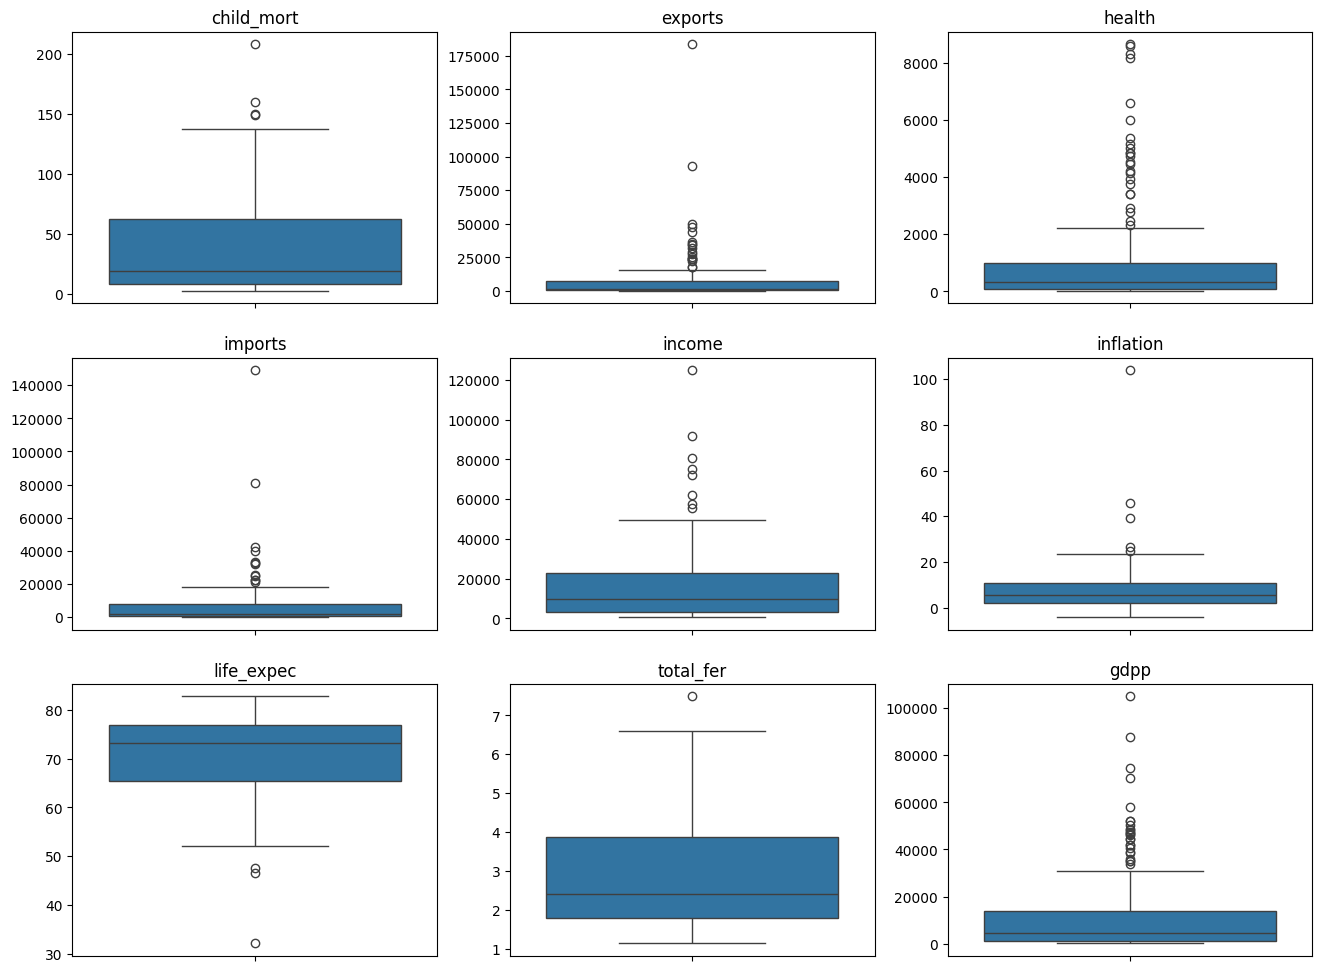

In [122]:
boxplot_for_outlier_analysis()

We have outliers for all the features.
Since datasetis of 167 countries for which we noeed to perform clustering and these feature are socio-economic and health factor we can not delete outliers.

So we follow strategy of capping of the outliers to specific percentile value of particular feature or keeping outlier as it is.

1) Child_mort
Since we have only higher outliers for child mortality and our objective is to identify countries having high child mortality rate. Let's

2) Health has also only higher outliers,  This mean that these countries spend relatively lot of money on the health and hence we can cap these outliers to the column's 99th percentile.

3) Import and Export have also higher outliers which implies that countries having higher inport and exports are doing good we can these 2 fatures to 99 percentile.

4) Similarly for income we have higher outliers which implies that people in these countries income are very higher than the other countries and hence we can cap these outliers to the 99th percentile.

5) Inflation has higher outliers and countries having higher inflation may require aid so we will keep it as it is.

6) life_expec has some lower outliers and these are the countries which need attention for aid so lets not cap these outliers and keep it as it is.

7) total_fer has some higher outliers and lets cap these outliers to 99th percentile

8) gdpp has huge amount of higher outliers and this indicate that these countries are doing well by themselves and hence we can cap these outliers to the column's 99th percentile.


In [123]:
# Based on above anaysis let's list higher outliers and perform outlier treatment.
higher_outlier_cols = ['exports','imports','health','income','total_fer','gdpp']

for col in higher_outlier_cols:
    soft_cap = df[col].quantile(0.99) # Get 99th quantile
    df.loc[df[col] >= soft_cap, col] = soft_cap # outlier capping

In [124]:
df.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Exports_Imports_Ratio
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6538.214776,1054.206622,5873.135222,16857.550898,7.781832,70.555689,2.942259,12756.826347,0.923072
std,40.328931,11415.308590,1790.845342,9422.700869,17957.012855,10.570704,8.893172,1.498340,17430.208938,0.444450
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000,0.079137
10%,4.200000,110.224800,36.502560,211.005600,1524.000000,0.587800,57.820000,1.452000,593.800000,0.456352
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000,0.649111
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000,0.893258
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000,1.133605
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000,1.387525
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000,1.583721


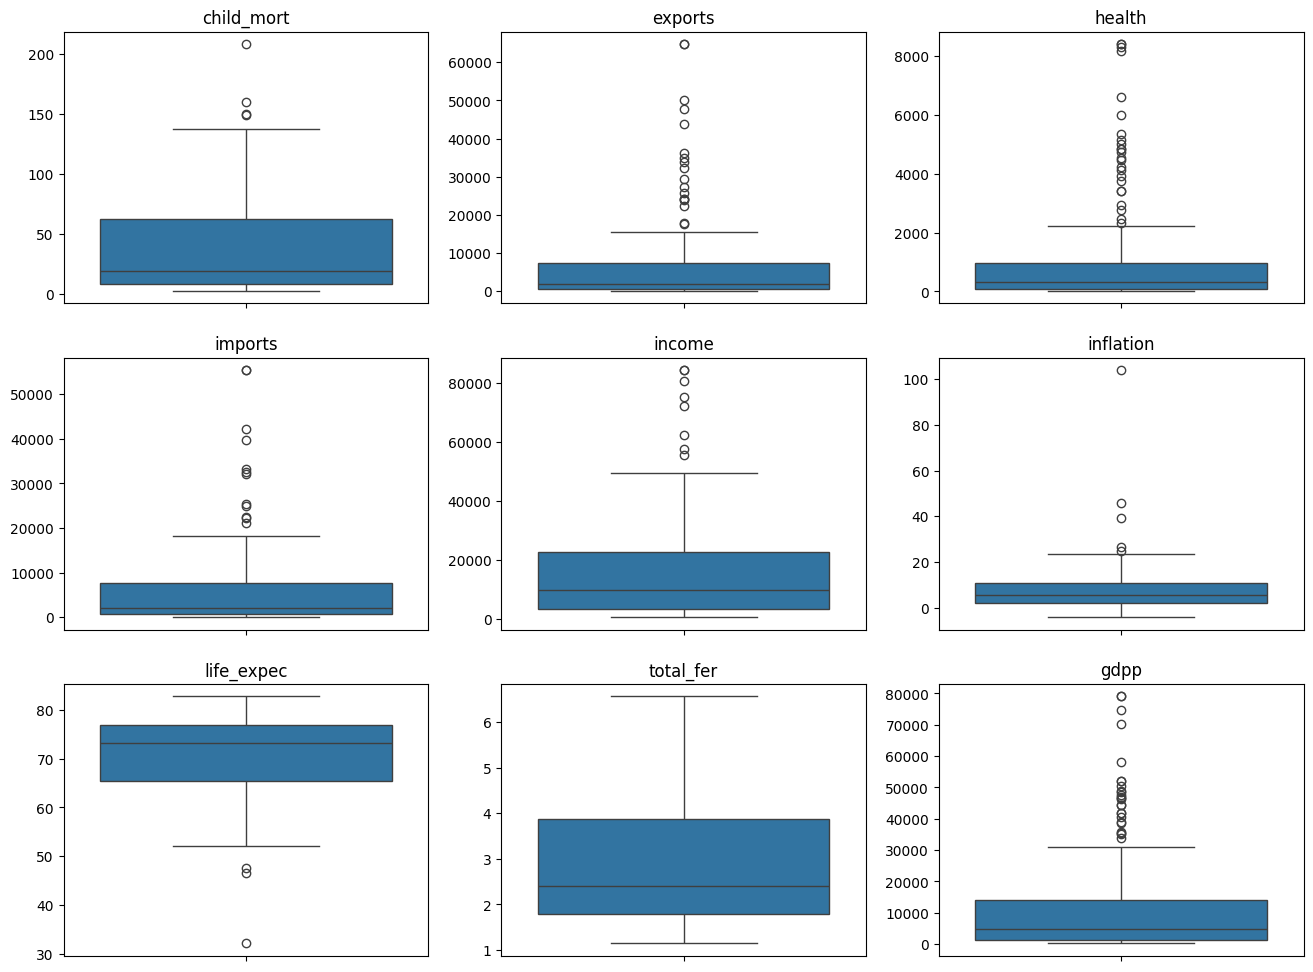

In [125]:
boxplot_for_outlier_analysis()

Since we have done soft capping box plot won't be able to give true picture of outliers. let's try boxenplot for higher outlier features

<Axes: ylabel='imports'>

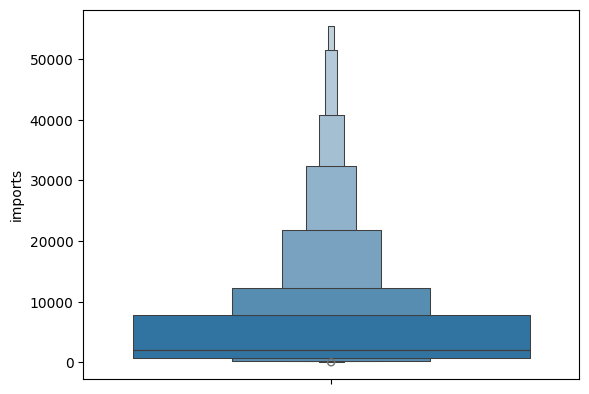

In [126]:
sns.boxenplot(data=df, y="imports", k_depth="proportion" , outlier_prop = 0.01)

Since we have done soft capping box plot won't be able to give true picture of outliers. let's try boxenplot for higher outlier features

This style of plot was originally named a “letter value” plot because it shows a large number of quantiles that are defined as “letter values”. It is similar to a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations. By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails.

In [127]:
def boxenplot_for_outlier_analysis():
    plt.figure(figsize=[16,12])
    i=1 # to track the ith plot in the subplot
    for col in higher_outlier_cols:
        plt.subplot(3,3,i)
        sns.boxenplot(y=df[col],trust_alpha=0.01)
        plt.title(col)
        plt.ylabel('')
        i+=1

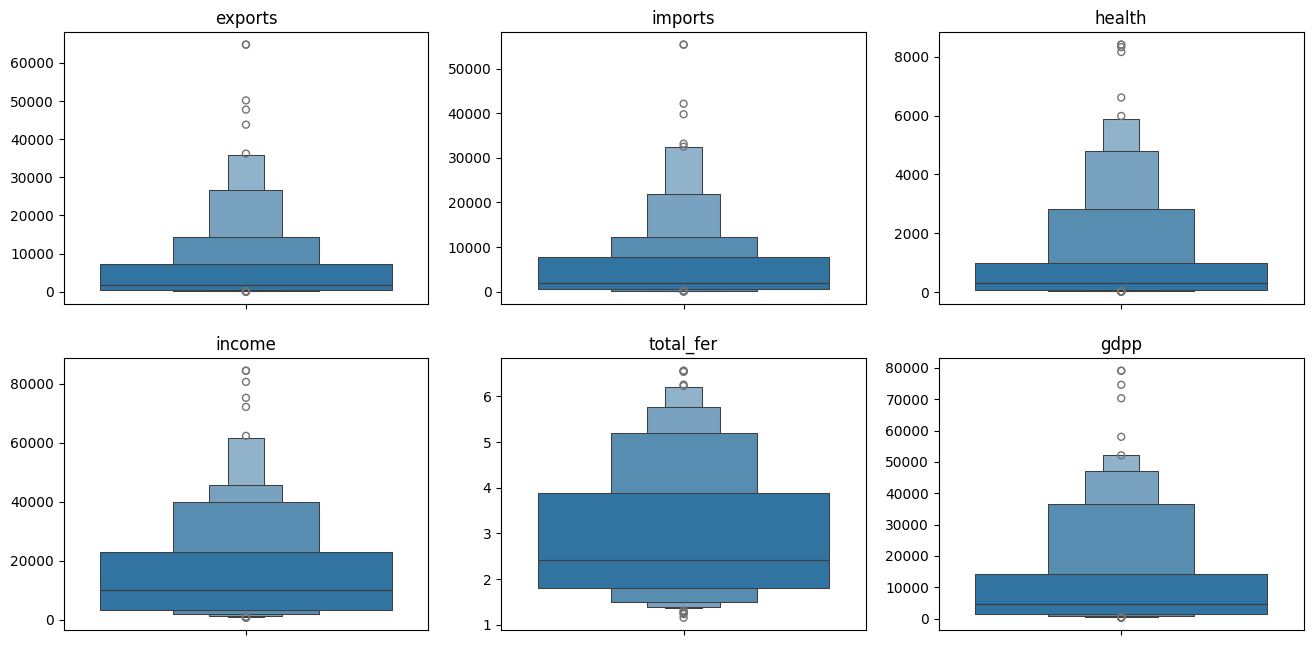

In [128]:
boxenplot_for_outlier_analysis()

# Univariate Analysis

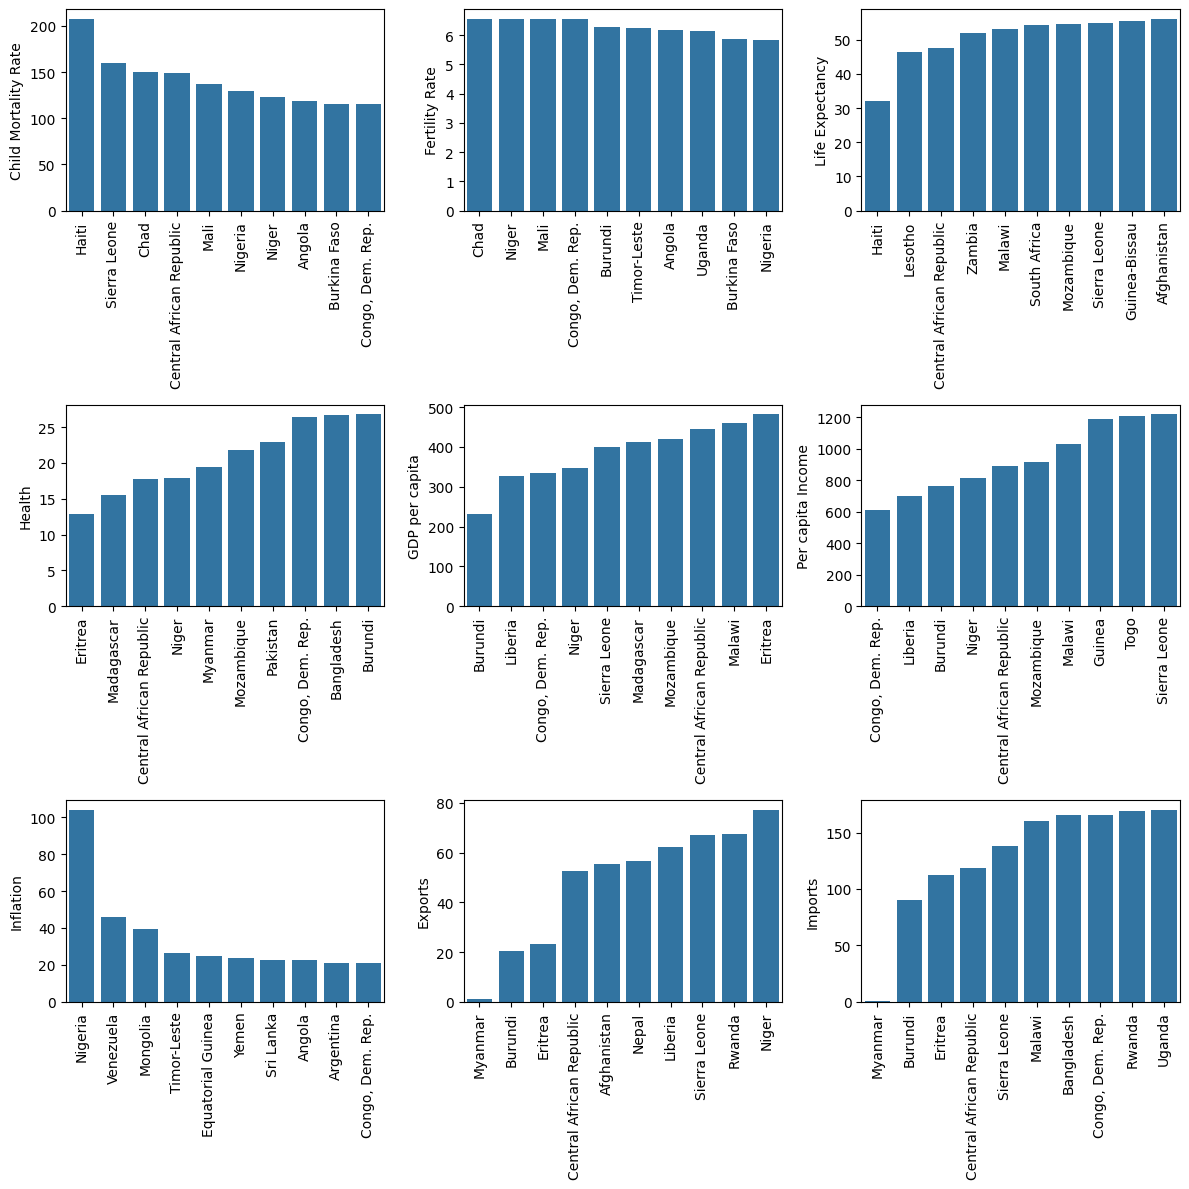

In [129]:
fig, axs = plt.subplots(3,3,figsize = (12,12))
# poor top 10 countries represented as `top10`

# Child Mortality Rate
top10_child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Exports
top10_exports = df[['country','exports']].sort_values('exports', ascending = True).head(10)
plt2 = sns.barplot(x='country', y='exports', data= top10_exports, ax = axs[2,1])
plt2.set(xlabel = '', ylabel= 'Exports')

# Health
top10_health = df[['country','health']].sort_values('health', ascending = True).head(10)
plt3 = sns.barplot(x='country', y='health', data= top10_health, ax = axs[1,0])
plt3.set(xlabel = '', ylabel= 'Health')

# Imports
top10_imports = df[['country','imports']].sort_values('imports', ascending = True).head(10)
plt4 = sns.barplot(x='country', y='imports', data= top10_imports, ax = axs[2,2])
plt4.set(xlabel = '', ylabel= 'Imports')

# Per capita Income
top10_income = df[['country','income']].sort_values('income', ascending = True).head(10)
plt5 = sns.barplot(x='country', y='income', data= top10_income, ax = axs[1,2])
plt5.set(xlabel = '', ylabel= 'Per capita Income')

# Inflation
top10_inflation = df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt6 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt6.set(xlabel = '', ylabel= 'Inflation')

# Fertility Rate
top10_total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt7 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt7.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy
top10_life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt8 = sns.barplot(x='country', y='life_expec', data= top10_life_expec, ax = axs[0,2])
plt8.set(xlabel = '', ylabel= 'Life Expectancy')

# The GDP per capita
top10_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt9 = sns.barplot(x='country', y='gdpp', data= top10_gdpp, ax = axs[1,1])
plt9.set(xlabel = '', ylabel= 'GDP per capita')


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)

plt.tight_layout()
# plt.savefig('eda')
plt.show()

Observations:

From above bar plot we could see the common countries in the profile of gdpp, child_mort and income are:

Congo, Dem. Rep., Niger, Sierra Leone,Central African Republic

# Bivariate Distributions using pairplot

<Figure size 600x600 with 0 Axes>

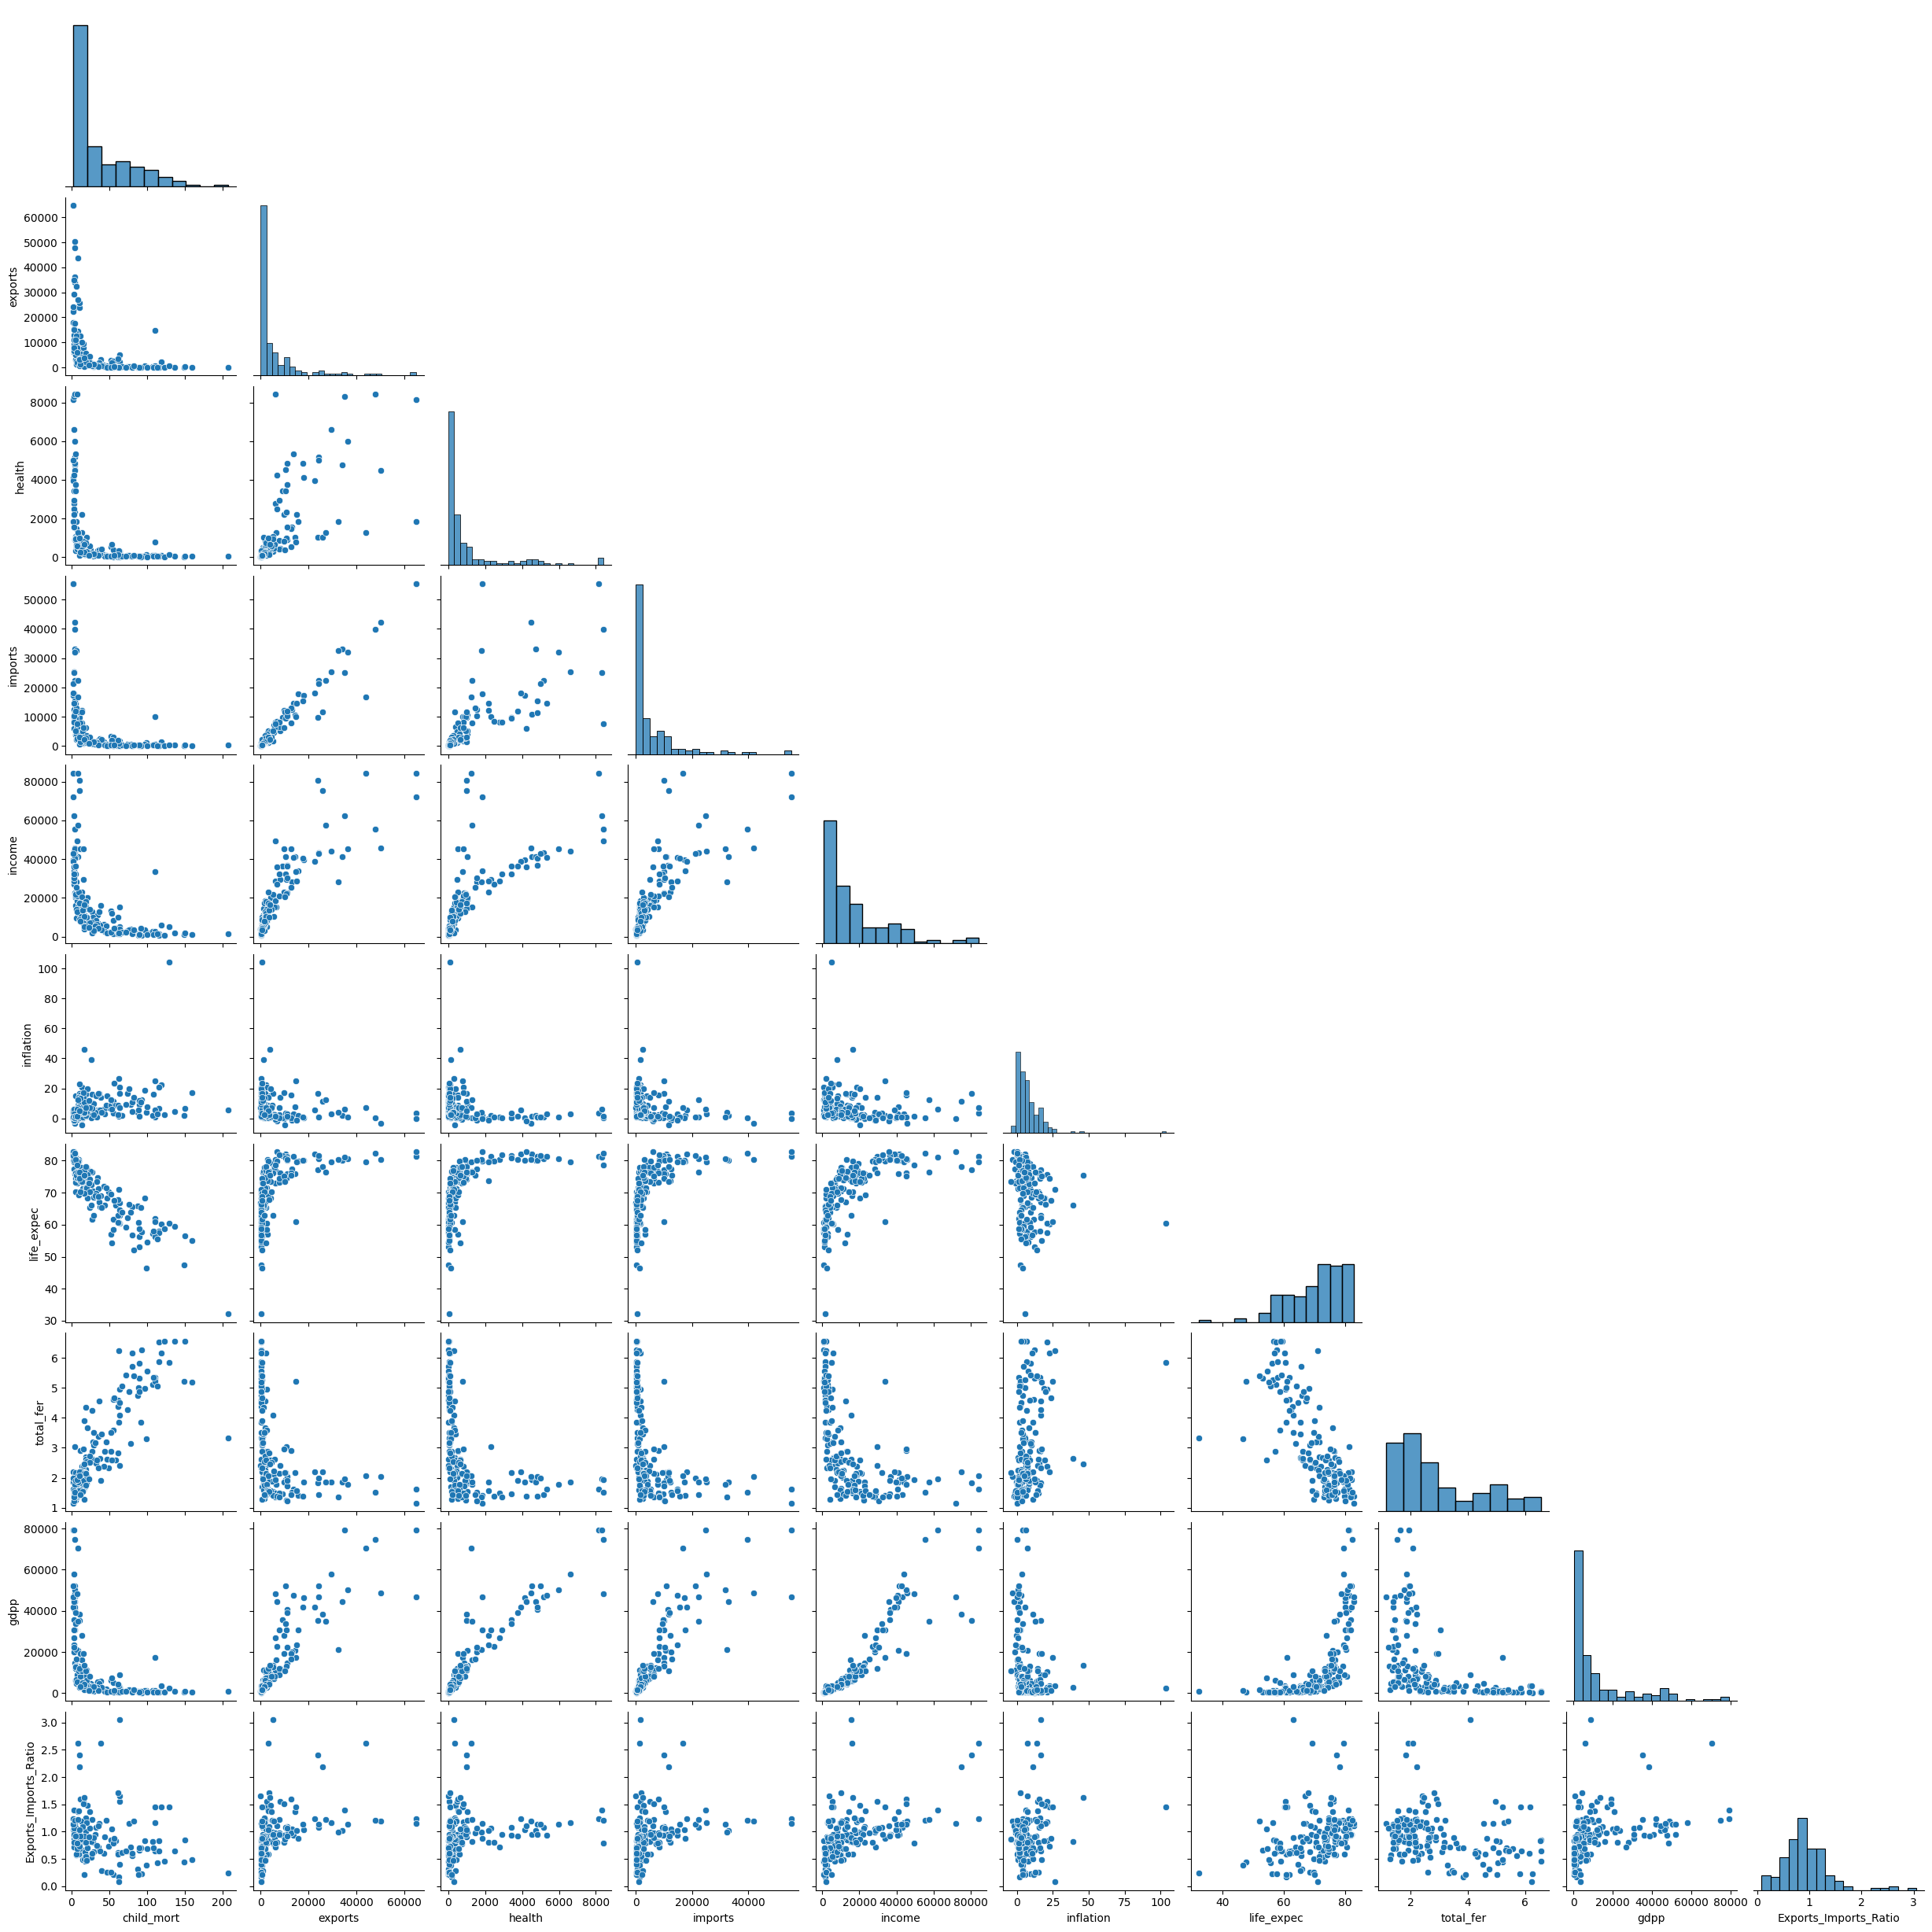

In [130]:
plt.figure(figsize=(6,6))
#sns.pairplot(df_numeric[['health', 'life_expec', 'income', 'child_mort']])
sns.pairplot(df, corner=True)
plt.show()

#Observations:

Following of the features seem to be quite right-skewed:
child_mort, exports, imports, income, inflation, total_fer,  gdpp

Left_expec is right skewed and health is Normally distributed.

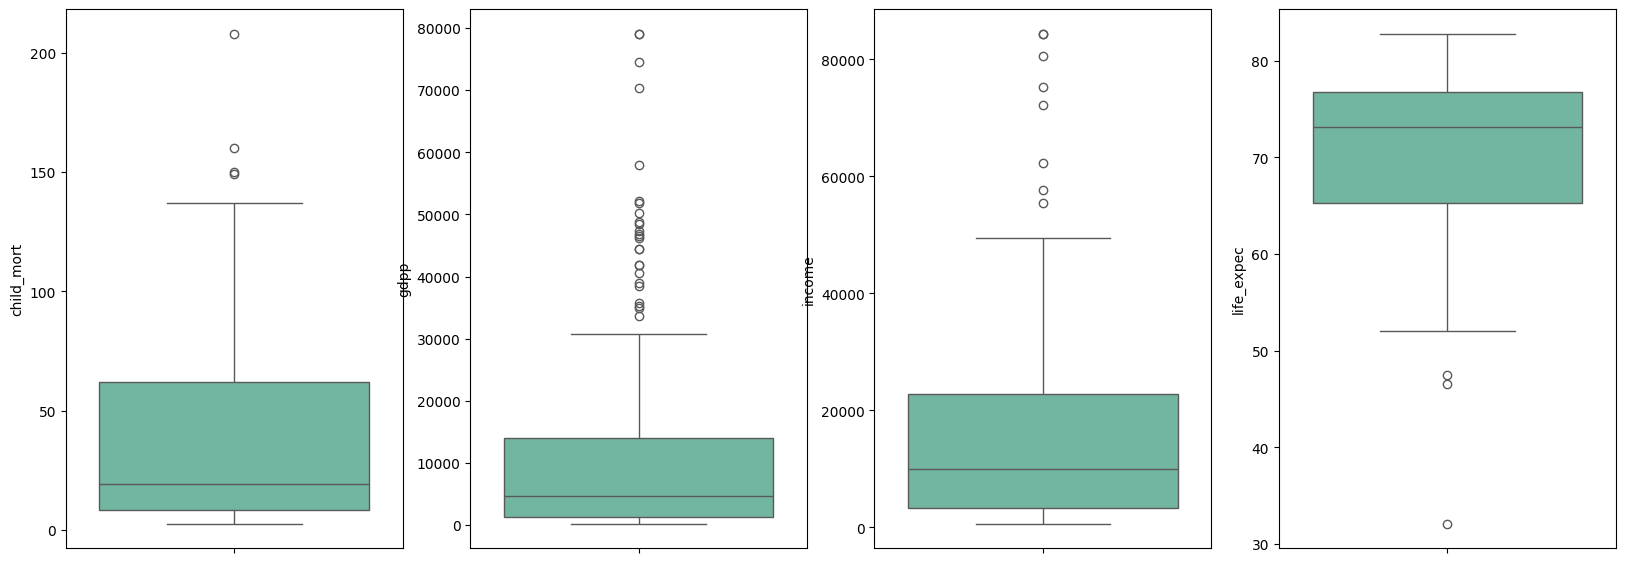

In [131]:
ftr_grp = ['child_mort', 'gdpp','income','life_expec']
count = 1
plt.figure(figsize=(20,7))
for i in ftr_grp:
  plt.subplot(1,4,count)
  sns.boxplot( y= df[i], palette ="Set2")
  count += 1

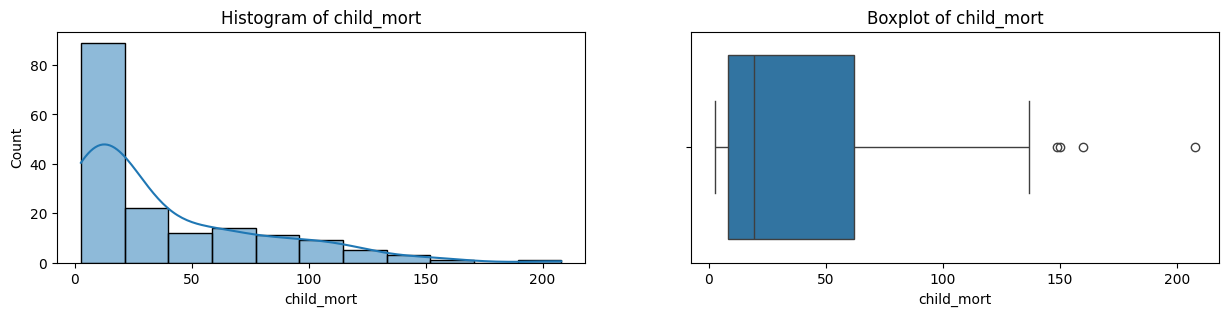

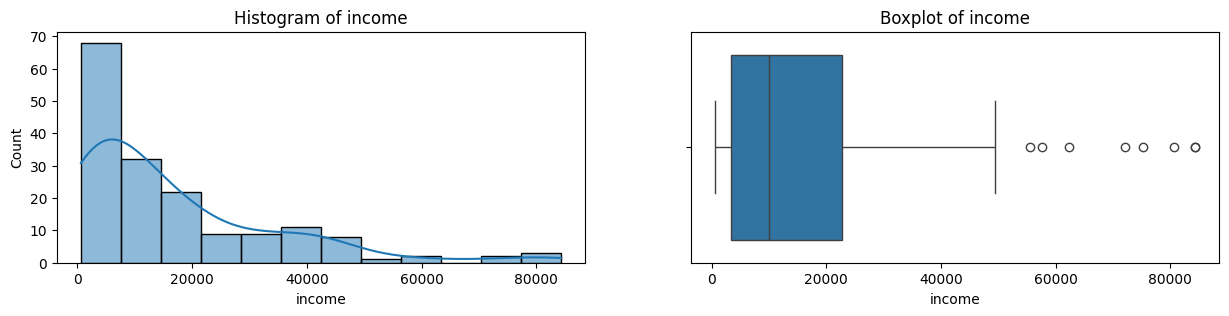

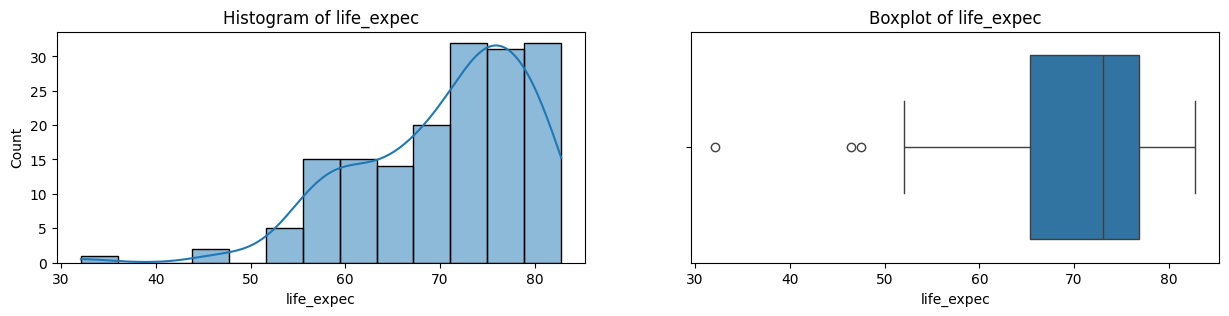

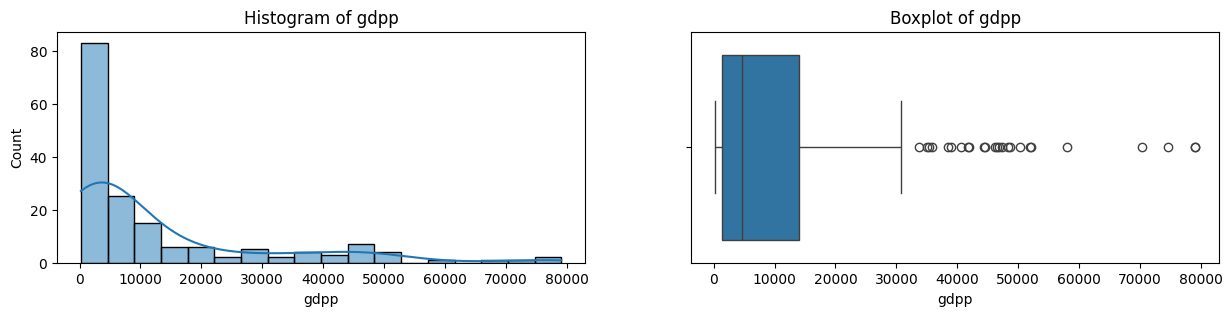

In [132]:
def plot_distributions(df, features):
    for feature in features:
        plt.figure(figsize=(15, 3))
        plt.subplot(1, 2, 1)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Histogram of {feature}')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[feature])
        plt.title(f'Boxplot of {feature}')

        plt.show()

plot_distributions(df, ['child_mort', 'income', 'life_expec', 'gdpp'])

# Observations

Child Mortality and GDPP display significant right skewness, with a small number of countries exhibiting notably high values for both child mortality rates and GDPP.

GDPP ranges from several thousand to 50,000.

Income is also right skewed. Life expectancy demonstrates left skewness, with most countries reporting life expectancies between 70 and 80 years.









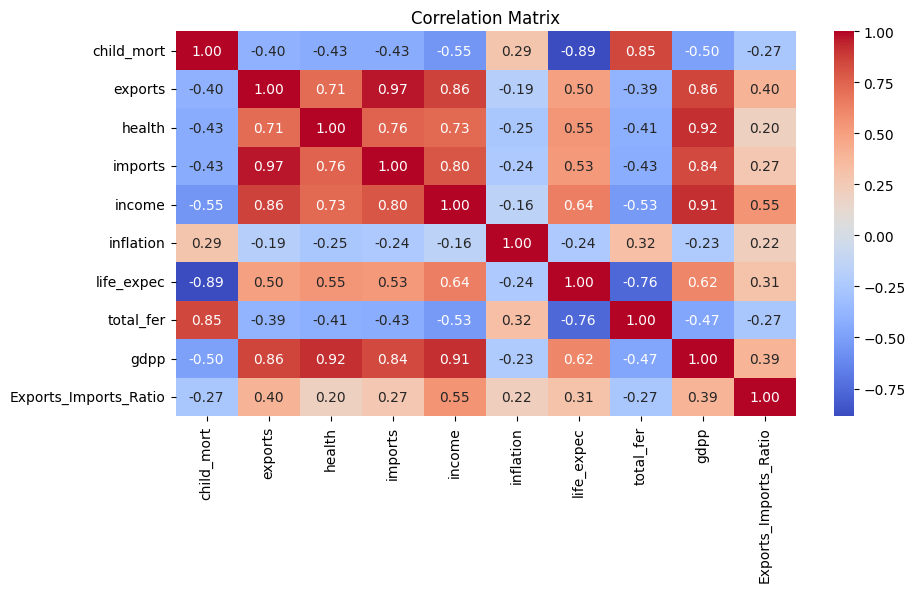

In [133]:
df_numeric = df.select_dtypes(include=['number'])

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Observations

•	Income vs GDP per capita (gdpp): Very strong positive correlation (≈ 0.90)

•	Income vs Life Expectancy: Strong positive correlation (≈ 0.61)

•	Income vs Child Mortality: Moderate negative correlation (≈ -0.52)

•	Child Mortality vs Total Fertility Rate: Very strong positive correlation (≈ 0.85)

•	Child Mortality vs Life Expectancy: Very strong negative correlation (≈ -0.89)

•	Exports vs Imports: Strong positive correlation (≈ 0.74)

•	GDP per capita vs Life Expectancy: Moderate positive correlation (≈ 0.60)

These relationships suggest that:

•	Wealthier countries tend to have better health outcomes (lower child mortality, higher life expectancy).

•	Countries with higher fertility rates tend to have higher child mortality and lower life expectancy.

•	Trade (exports and imports) is closely linked, and moderately tied to income.


•	There is a moderate negative correlation between GDP per capita and total fertility rate; wealthier countries tend to have lower fertility rates than poorer ones.




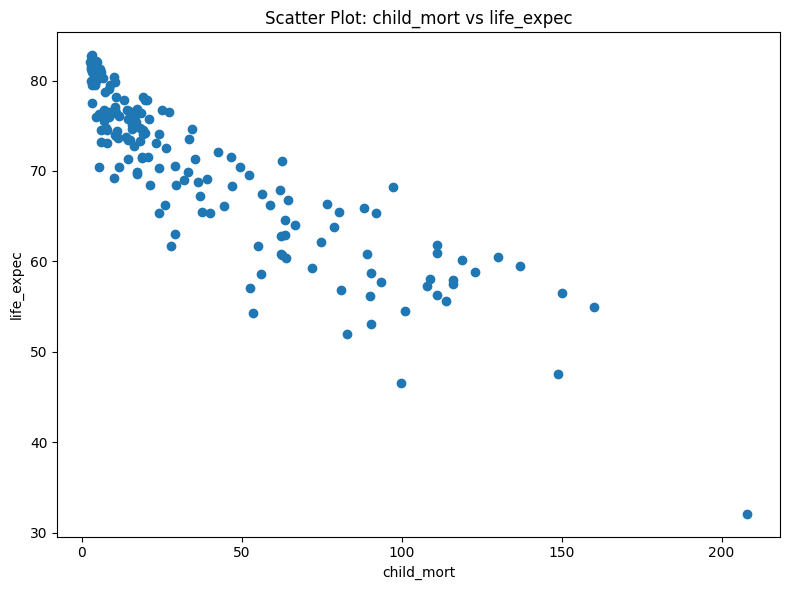

In [134]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df['child_mort'], df['life_expec'])
#for i, label in enumerate(df['country']):
#    ax.text(df['child_mort'].iloc[i], df['gdpp'].iloc[i], label, fontsize=8, ha='right')
ax.set_xlabel('child_mort')
ax.set_ylabel('life_expec')
ax.set_title('Scatter Plot: child_mort vs life_expec')
plt.tight_layout()
plt.show()

# Hypothesis Testing

**1 - Health Spending and Life Expectancy**

In [135]:
# Hypothesis: Increased health spending leads to higher life expectancy
high_health_spending = df[df['health'] > df['health'].median()]['life_expec']
low_health_spending = df[df['health'] <= df['health'].median()]['life_expec']

t_stat, p_value = stats.ttest_ind(high_health_spending, low_health_spending)
print(f"T-test for Health Spending and Life Expectancy: t_stat={t_stat}, p_value={p_value}")

T-test for Health Spending and Life Expectancy: t_stat=10.178026288835719, p_value=3.4481955345222564e-19



**Result: Statistically significant difference (p < 0.05),**

**confirming the hypothesis: Higher health spending → higher life expectancy**



**2 - Fertility and Development**

In [136]:
# Hypothesis: Countries with higher Total_fertility rates have lower Income per person

correlation_fertility_income, _ = stats.pearsonr(df['total_fer'], df['income'])
print(f"Correlation between Fertility and Income: {correlation_fertility_income}")

Correlation between Fertility and Income: -0.5307716742553831


In [137]:
high_fertility = df[df['total_fer'] > df['total_fer'].median()]['income']
low_fertility = df[df['total_fer'] <= df['total_fer'].median()]['income']

t_stat, p_value = stats.ttest_ind(high_fertility, low_fertility)
print(f"T-test for Fertility and Income: t_stat={t_stat}, p_value={p_value}")

T-test for Fertility and Income: t_stat=-8.594730740392022, p_value=6.108612259736678e-15


**Result: Negative correlation (≈ –0.53) with p < 0.05.**

**3 - Income and Child Mortality**

In [138]:
#Hypothesis : Higher income levels are associated with lower child mortality rates.

correlation_income_child_mort, _ = stats.pearsonr(df['income'], df['child_mort'])
print(f"Correlation between Income and Child Mortality: {correlation_income_child_mort}")

Correlation between Income and Child Mortality: -0.5508344046144528


In [139]:
high_income = df[df['income'] > df['income'].median()]['child_mort']
low_income = df[df['income'] <= df['income'].median()]['child_mort']

t_stat, p_value = stats.ttest_ind(high_income, low_income)
print(f"T-test for Income and Child Mortality: t_stat={t_stat}, p_value={p_value}")

T-test for Income and Child Mortality: t_stat=-10.186018565020449, p_value=3.2785691051974e-19


** Result: Strong negative correlation (≈ –0.55). **

**4 - Inflation and Economic Stability**

In [140]:
# ○	Hypothesis: Higher inflation rates are associated with lower GDP per capita, indicating economic instability.

correlation_inflation_gdpp, _ = stats.pearsonr(df['inflation'], df['gdpp'])
print(f"Correlation between Inflation and GDP per Capita: {correlation_inflation_gdpp}")

Correlation between Inflation and GDP per Capita: -0.2290080503982672


In [141]:
high_inflation = df[df['inflation'] > df['inflation'].median()]['gdpp']
low_inflation = df[df['inflation'] <= df['inflation'].median()]['gdpp']

t_stat, p_value = stats.ttest_ind(high_inflation, low_inflation)
print(f"T-test for Inflation and GDP per Capita: t_stat={t_stat}, p_value={p_value}")

T-test for Inflation and GDP per Capita: t_stat=-3.809663480803681, p_value=0.00019605131426063326


**Result: Modest negative correlation (≈ –0.28), supporting our expectation.**

Before we apply any clustering algorithm to the given data, it's important to check whether the given data has some meaningful clusters or not. This usually means the given data is not random.

The process to evaluate the data to check if the data is feasible for clustering or not is know as the clustering tendency.

To check cluster tendency, we use Hopkins test.

Hopkins test examines whether data points differ significantly from uniformly distributed data in the multidimensional space.

In [142]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [143]:
numerical_cols = list(df.columns) # Get all column names
numerical_cols.remove('country') # Remove country as its not numerical
numerical_cols

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp',
 'Exports_Imports_Ratio']

In [144]:
for i in range (1, 20):
  #hopkins(df[numerical_cols])
  print(hopkins(df[numerical_cols]))

0.9059873353824315
0.955749281626108
0.9456767748310634
0.958251397894315
0.8785322388867121
0.8833116228652808
0.9529576464873241
0.9389514381779226
0.9301868382384686
0.9032594313820168
0.9010240712510114
0.9064347448217196
0.9188096176543482
0.9175945088002305
0.8859190362671518
0.9399027332439982
0.9037140091840861
0.8678047588322542
0.9371879018667679


Interpretation of Hopkins score:

Hopkins Statistic over .70 is a good score that indicated that the data is good for cluster analysis.

A 'Hopkins Statistic' value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

Hopkins test results will vary as it picks a set of samples each time. On running it multiple times, it can be seen that this data set gives Hopkins statistic value in the range of 0.84 to 0.96 and hence our dataset is good for clustering and lets proceed our analysis

# Scaling

*   Feature scaling is essential for machine learning algorithms that calculate distances between data.

*   Most of distance based models e.g. k-means and Hierarchical clustering need standard scaling so that large-scaled features don't dominate the variation.

*   If we do not scale, the feature with a higher value range starts dominating when calculating distances

*   We have chosen StandardScaler as clustering does not work well when the variance differs a lot.

In [145]:
# Scaling on numerical features

scaler = StandardScaler() # instantiate scaler

df_scaled = scaler.fit_transform(df[numerical_cols]) # fit parameters to have mean 0 and SD as 1 and transform data accordingly
df_scaled = pd.DataFrame(df_scaled, columns = numerical_cols) # convert to dataframe
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Exports_Imports_Ratio
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.926396,-0.702259,-1.580519
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.865054,-0.498726,-0.782954
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.034983,-0.477434,0.676702
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.153997,-0.530950,1.194138
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.543736,-0.032042,-0.339811
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,-0.452874,-0.503105,-0.458563,-0.776821,-0.489784,-0.852161,0.373359,-0.563175,-0.087609
163,-0.526514,-0.236420,-0.219189,-0.372256,-0.019971,3.616865,0.546361,-0.316136,0.042765,1.571248
164,-0.372315,-0.491607,-0.540250,-0.513337,-0.690802,0.409732,0.286958,-0.664231,-0.658699,-0.057132
165,0.448417,-0.539950,-0.552429,-0.577202,-0.691361,1.500916,-0.344633,1.156572,-0.658699,-0.115046


# PCA

In [227]:
from sklearn.decomposition import PCA
pc = PCA(svd_solver='auto')
pc.fit(df_scaled)
print('Total no. of principal components =',pc.n_components_)

Total no. of principal components = 10


In [228]:
#Print Principal Components
print('Principal Component Matrix :\n',pc.components_)

Principal Component Matrix :
 [[-0.30252606  0.35867534  0.34079657  0.35780519  0.38036631 -0.12511414
   0.33119697 -0.29069392  0.38286307  0.18588312]
 [ 0.47664626  0.30392811  0.16257283  0.23631814  0.18232709  0.35848216
  -0.3502315   0.46678341  0.208693    0.2287042 ]
 [-0.19614748 -0.11429942 -0.24409689 -0.20922175  0.08898781  0.60693031
   0.17462551 -0.16527365 -0.10849427  0.63185528]
 [-0.13413644 -0.06516822  0.287779    0.06163063 -0.11618861  0.67613856
   0.22559482  0.00381234  0.07813569 -0.60288435]
 [ 0.07390332 -0.46573318  0.59781953 -0.48926032  0.02916276 -0.11713986
   0.05326543  0.14601697  0.3227049   0.19493133]
 [-0.19198651  0.05262838 -0.19078354 -0.00750919  0.03252368 -0.12285114
   0.57992302  0.75495223 -0.03406515  0.01850633]
 [ 0.04392657 -0.05880147 -0.35708776 -0.34853046  0.76479165  0.02855096
  -0.08840815 -0.02148882  0.20406987 -0.33163833]
 [ 0.76170897 -0.02645577 -0.07454697  0.01584556 -0.01012206 -0.01947123
   0.58102302 -0.2730

Let us check the amount of variance explained by each principal component here. They will be arranged in decreasing order of their explained variance ratio.

In [229]:
#The amount of variance that each PC explains
var = pc.explained_variance_ratio_
print(var)

[0.58619175 0.15276085 0.12166262 0.05584056 0.03676755 0.02180064
 0.01344737 0.00849356 0.00222013 0.00081497]


Text(0, 0.5, 'Explained Variance Ratio')

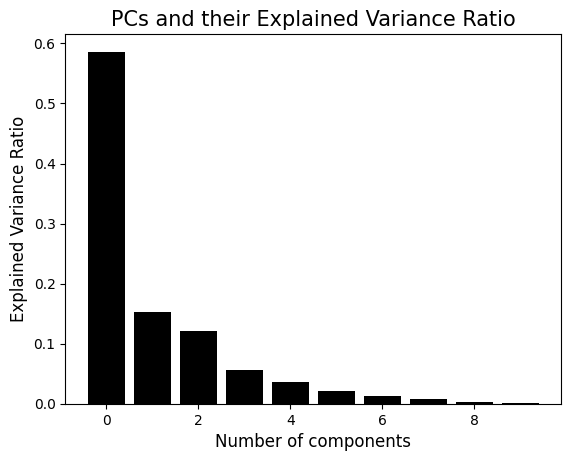

In [230]:
#Plot explained variance ratio for each PC
plt.bar([i for i, _ in enumerate(var)],var,color='black')
plt.title('PCs and their Explained Variance Ratio', fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Explained Variance Ratio',fontsize=12)

We can see, the variance explained by first and second principal components are nearly 58% and 15% respectively. We can now count cumulative variance explained by them. For convenience of observation, we are converting the figures to percentages here.

In [231]:
#Cumulative Variance explained by each PC
import numpy as np
cum_var = np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
print(cum_var)

[ 58.62  73.9   86.07  91.65  95.33  97.51  98.85  99.7   99.92 100.  ]


Using these cumulative variance ratios for all PCs, we will now draw a scree plot. It is used to determine the number of principal components to keep in this principal component analysis

Text(0, 0.5, 'Cumulative Explained Variance Ratio')

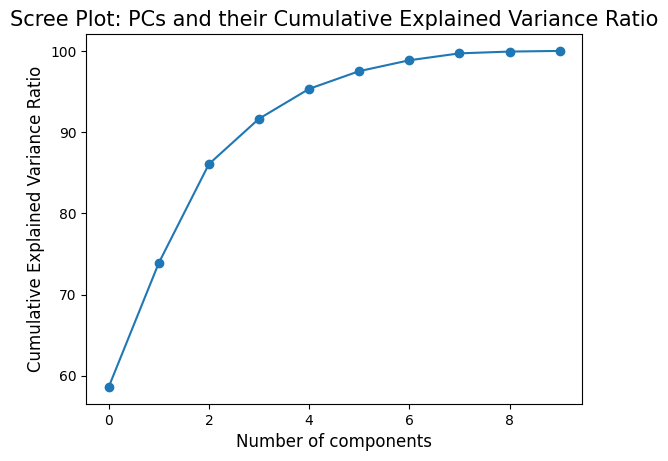

In [232]:
# Scree Plot
plt.plot(cum_var, marker='o')
plt.title('Scree Plot: PCs and their Cumulative Explained Variance Ratio',fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize=12)

The plot indicates the threshold of around 90% is getting crossed at PC = 4. Ideally, we can keep 4 (or atmost 5) components here. Before PC = 5, the plot is following an upward trend. After crossing 5, it is almost steady. However, we have retailed all 10 PCs here to get the full data in results. And for visualization purpose in 2-D figure, we have plotted only PC1 vs PC2.

In [237]:
#Principal Component Data Decomposition
colnames = list(df_scaled.columns)
pca_data = pd.DataFrame({ 'Features':colnames,'PC1':pc.components_[0],'PC2':pc.components_[1],'PC3':pc.components_[2],
                          'PC4':pc.components_[3],'PC5':pc.components_[4], 'PC6':pc.components_[5], 'PC7':pc.components_[6],
                          'PC8':pc.components_[7], 'PC9':pc.components_[8], 'PC10':pc.components_[9]})
pca_data

,Features,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,child_mort,-0.302526,0.476646,-0.196147,-0.134136,0.073903,-0.191987,0.043927,0.761709,-0.017713,0.007453
1,exports,0.358675,0.303928,-0.114299,-0.065168,-0.465733,0.052628,-0.058801,-0.026456,0.296879,0.670594
2,health,0.340797,0.162573,-0.244097,0.287779,0.597820,-0.190784,-0.357088,-0.074547,-0.335581,0.274877
3,imports,0.357805,0.236318,-0.209222,0.061631,-0.489260,-0.007509,-0.348530,0.015846,-0.284925,-0.571155
4,income,0.380366,0.182327,0.088988,-0.116189,0.029163,0.032524,0.764792,-0.010122,-0.462273,0.006815
5,inflation,-0.125114,0.358482,0.606930,0.676139,-0.117140,-0.122851,0.028551,-0.019471,0.016908,-0.003861
6,life_expec,0.331197,-0.350232,0.174626,0.225595,0.053265,0.579923,-0.088408,0.581023,-0.002925,0.041221
7,total_fer,-0.290694,0.466783,-0.165274,0.003812,0.146017,0.754952,-0.021489,-0.273081,-0.055540,-0.029784
8,gdpp,0.382863,0.208693,-0.108494,0.078136,0.322705,-0.034065,0.204070,-0.024210,0.707325,-0.379669
9,Exports_Imports_Ratio,0.185883,0.228704,0.631855,-0.602884,0.194931,0.018506,-0.331638,-0.007914,-0.019184,-0.040938


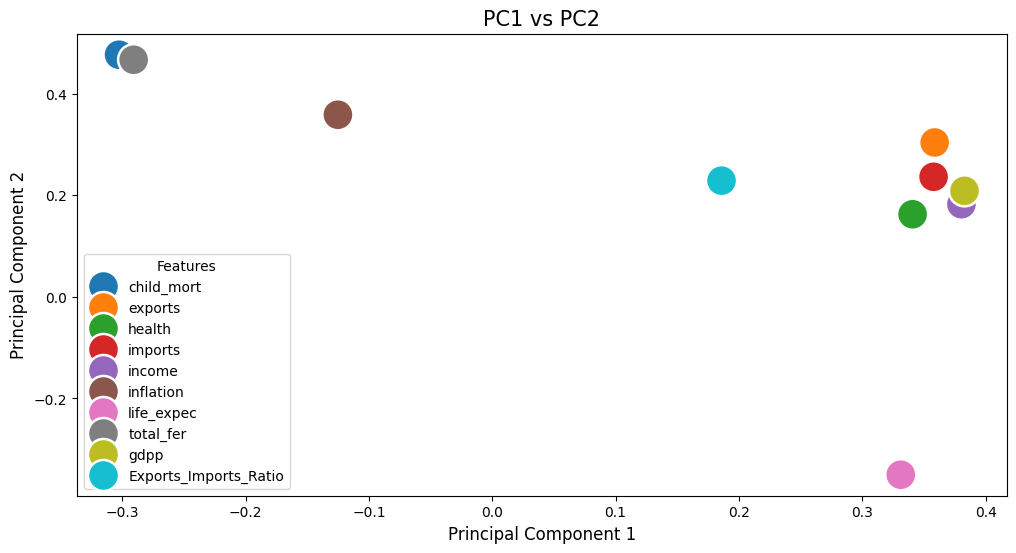

In [239]:
#Visualize 2 main PCs
fig = plt.figure(figsize = (12,6))
sns.scatterplot(x=pca_data.PC1, y=pca_data.PC2,hue=pca_data.Features,marker='o', s=500)
plt.title('PC1 vs PC2',fontsize=15)
plt.xlabel('Principal Component 1',fontsize=12)
plt.ylabel('Principal Component 2',fontsize=12)
plt.show()

We can see that 1st Principal Component (X-axis) is gravitated mainly towards features like: life expectancy, gdpp, income. 2nd Principal Component (Y-axis) is gravitated predominantly towards features like: imports, exports.

# Build Model using K Means Clustering

Let's try both Elbow and Sihouette Anaysis methods one be one

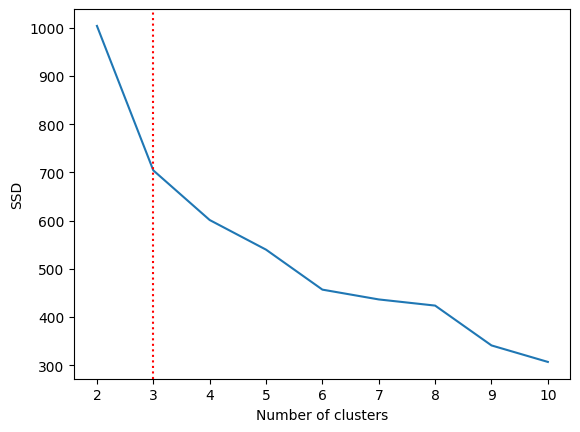

In [146]:
# Elbow curve-ssd
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df_scaled)
    ssd.append([k, kmean.inertia_])

temp = pd.DataFrame(ssd)
ax = plt.axes()
ax.plot(temp[0], temp[1]) # plot the SSDs for each n_clusters
ax.axvline(3, ls='dotted',color='red') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

INFERENCE:

SSD flattens and forms an elbow at 3 indicating that 3 is optimal value of k.

Silhouette Analysis

The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

Lets use KMeans() from sklearn to form clusters of 2,3,4 and so on till 11 and calculate silhouette_score and plot the number of clusters against silhouette_score

For k_clusters=2, the silhouette score is 0.436365
For k_clusters=3, the silhouette score is 0.376271
For k_clusters=4, the silhouette score is 0.361413
For k_clusters=5, the silhouette score is 0.251177
For k_clusters=6, the silhouette score is 0.211611
For k_clusters=7, the silhouette score is 0.250962
For k_clusters=8, the silhouette score is 0.212107
For k_clusters=9, the silhouette score is 0.277569
For k_clusters=10, the silhouette score is 0.197850


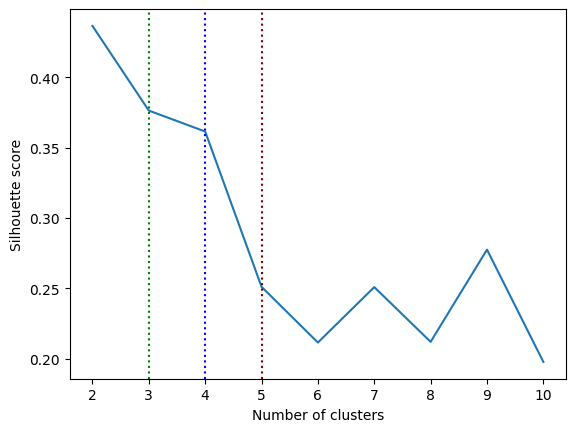

In [147]:
from sklearn.metrics import silhouette_score
silhouette_scores_list = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df_scaled) # intialise kmeans
    silhouette_avg = silhouette_score(df_scaled, kmean.labels_) # silhouette score
    silhouette_scores_list.append([k, silhouette_avg])
    print("For k_clusters={0}, the silhouette score is {1:2f}".format(k, silhouette_avg))

temp = pd.DataFrame(silhouette_scores_list)
ax = plt.axes()
ax.plot(temp[0], temp[1])
ax.axvline(3, ls='dotted',color='green') # elbow formed as 3
ax.axvline(4, ls='dotted',color='blue') # elbow formed as 4
ax.axvline(5, ls='dotted',color='maroon') # elbow formed as 5
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

Observations :

*   The silhouette score is maximum when k is 2 which is 0.47
*   2 is very less number of clusters and countries within the 2 clusters might be very different.

So lets look at the next optimal silhouette score.

*   3,4,5 seem to have good silhouette scores. As k increases, silhouette score decreases and hence these will have definitely lesser sihouette score than that of k=2.

*   Though elbow curve indicate 3 is optimal number and silhouette score of 3 seem to be the best, lets use K-means algorithm for k=3,4,5 and see which value of k gives us better cluster profiling

In [148]:
# Function for all steps of Kmeans Clustering; Call with K=3,4,5
def K_means_model(k):
    kmean = KMeans(n_clusters = k, random_state = 50+k)
    kmean.fit(df_scaled)
    df_kmean = df.copy() # copy the actual data into a new dataframe to explain the cluster profiling
    label  = pd.DataFrame(kmean.labels_, columns= ['k_means_cluster_label'])
    df_kmean = pd.concat([df_kmean, label], axis =1) # assign the countries with the cluster labels.
    print("Number of countries in each cluster(k=%s):" %k)
    print(df_kmean.k_means_cluster_label.value_counts())# shows how many countries are in each cluster
    return(df_kmean) # returns clustered labelled dataset for further analysis

In [149]:
# Created Models are available globally to access inside cluster profiling functions
k_3_model = K_means_model(3) # K means model with 3 clusters

Number of countries in each cluster(k=3):
k_means_cluster_label
0    93
2    45
1    29
Name: count, dtype: int64


In [150]:
k_4_model = K_means_model(4) # K means model with 4 clusters

Number of countries in each cluster(k=4):
k_means_cluster_label
0    84
2    44
3    30
1     9
Name: count, dtype: int64


In [151]:
k_5_model = K_means_model(5) # K means model with 5 clusters

Number of countries in each cluster(k=5):
k_means_cluster_label
4    75
3    42
2    30
1    11
0     9
Name: count, dtype: int64


We can see that when there are 3 or 4 clusters, there are some distribution of countries.

This would make actionable items a bit tedious. We will progress with these 3 models and profile the clusters created by each model based on 3 important features i.e GDPP, Income and Child_mortality and see which is a good value of k.

In [152]:
# Function for Profiling Clusters to plot scatter plots
def clusters_scatter_plots(col1, col2):
    plt.figure(figsize=(18,8))
    plt.subplot(2,2,1)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = k_3_model, palette=['blue','green','red'])
    plt.subplot(2,2,2)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = k_4_model, palette=['orange','blue','green','red'])
    plt.subplot(2,2,3)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = k_5_model, palette=['red','orange','maroon','green','blue'])

Visualization of GDPP vs Income when k=3,4,5

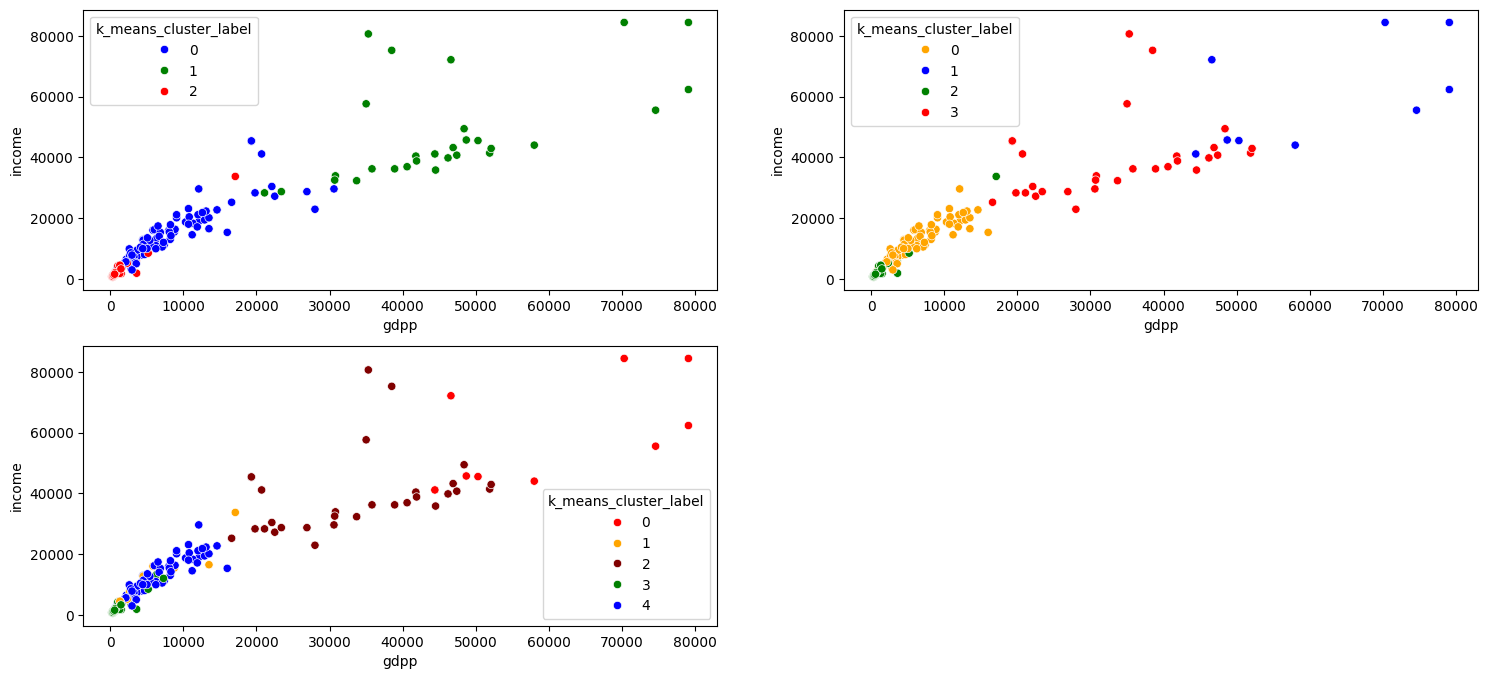

In [153]:
clusters_scatter_plots('gdpp','income')

Lets visualize the clusters more and see which helps in understanding the clusters and identifying countries in need.

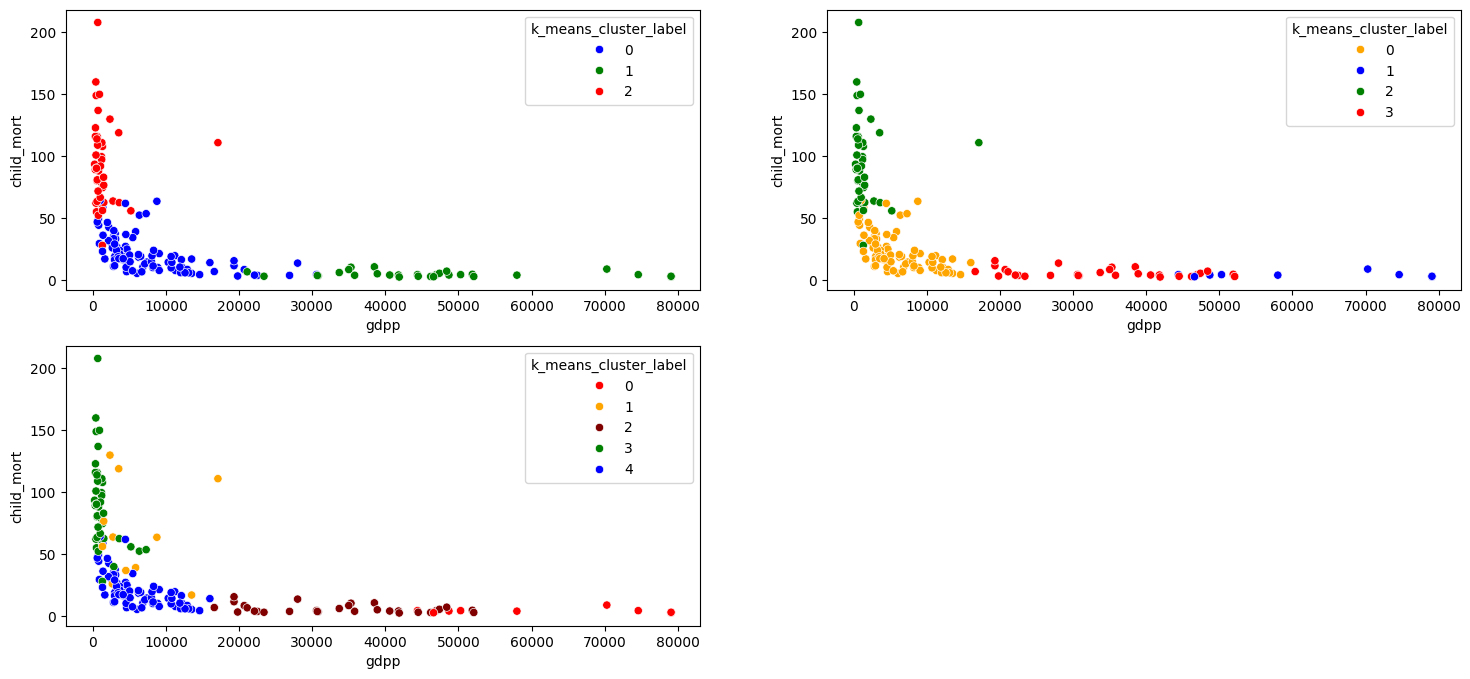

In [154]:
clusters_scatter_plots('gdpp','child_mort')

Observations :

This plot is very helpful to see the clustered groups. For e.g. when k=3, we see that cluster 2 require aid as their gdpp is low and child mortality is pretty high.


As the cluster labels are picked in random and assigned, we can see similar group is represented as 3 when k=4 and k=5.

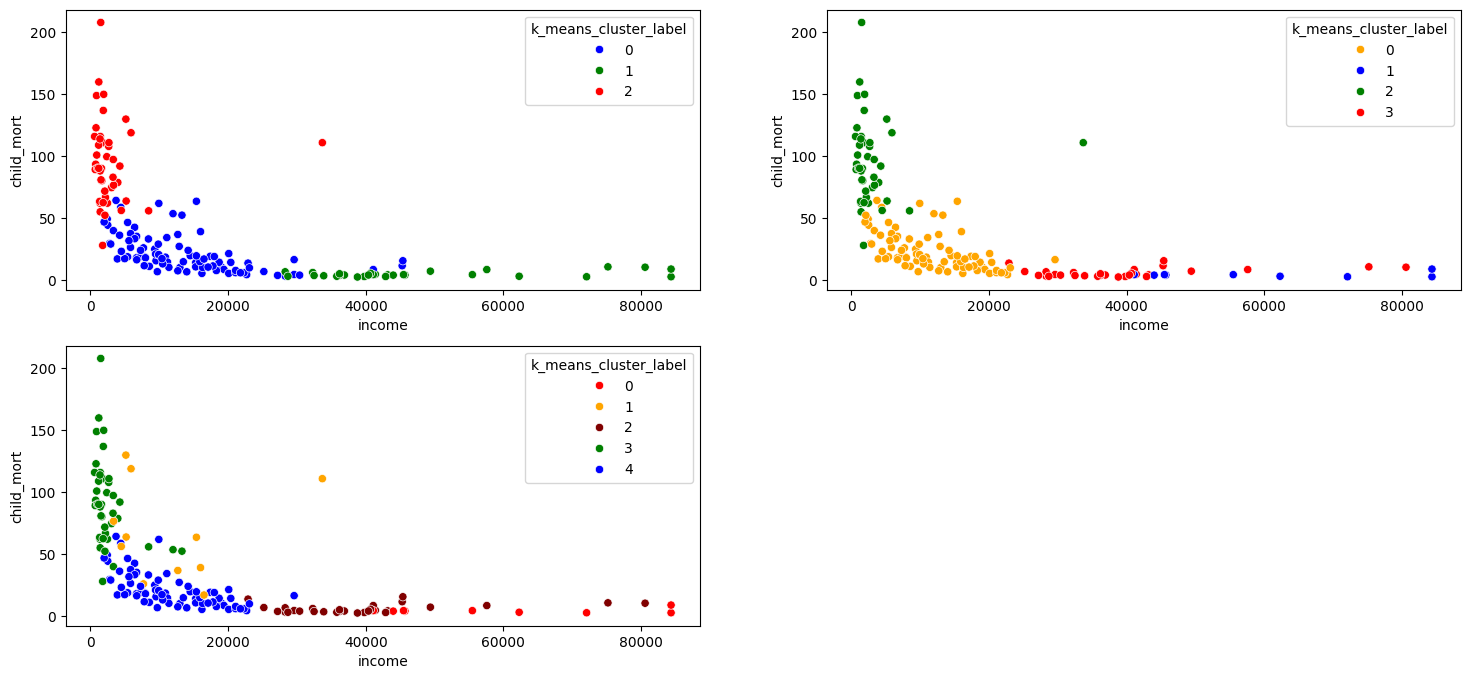

In [155]:
# Let's Visualization of Child mortality vs Income when k=3,4,5
clusters_scatter_plots('income','child_mort')

Observations :

As we saw in previous two scatter plots, we can see that same cluster which had bad child_moratality rate and low gdpp has low income in this plot.

Visualization of univariate distributions when k=3,4,5
Lets also do some boxplots to understand the gdpp, income and child_mortality data distributions within each cluster:


In [156]:
# Function for Profiling Clusters to plot box plots
def clusters_box_plots(column_name, logy=False):
    #plt.figure(figsize=(18,8))

    if logy:
        i=1
    else:
        i=0

    plt.subplot(2+i,2,1)
    sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_3_model, palette=['red','green','blue'])
    if logy:
        plt.subplot(3,2,2)
        sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_3_model, palette=['red','green','blue'])
        plt.yscale('log')

    plt.subplot(2+i,2,2+i)
    sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_4_model, palette=['orange', 'blue','green','red'])
    if logy:
        plt.subplot(3,2,4)
        sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_4_model, palette=['orange','blue','green','red'])
        plt.yscale('log')

    plt.subplot(2+i,2,3+i+i)
    sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_5_model, palette=['red','blue','maroon','green','orange'])
    if logy:
        plt.subplot(3,2,6)
        sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_5_model, palette=['red','blue','maroon','green','orange'])
        plt.yscale('log')


Visualization of GDPP distribution when k=3,4,5

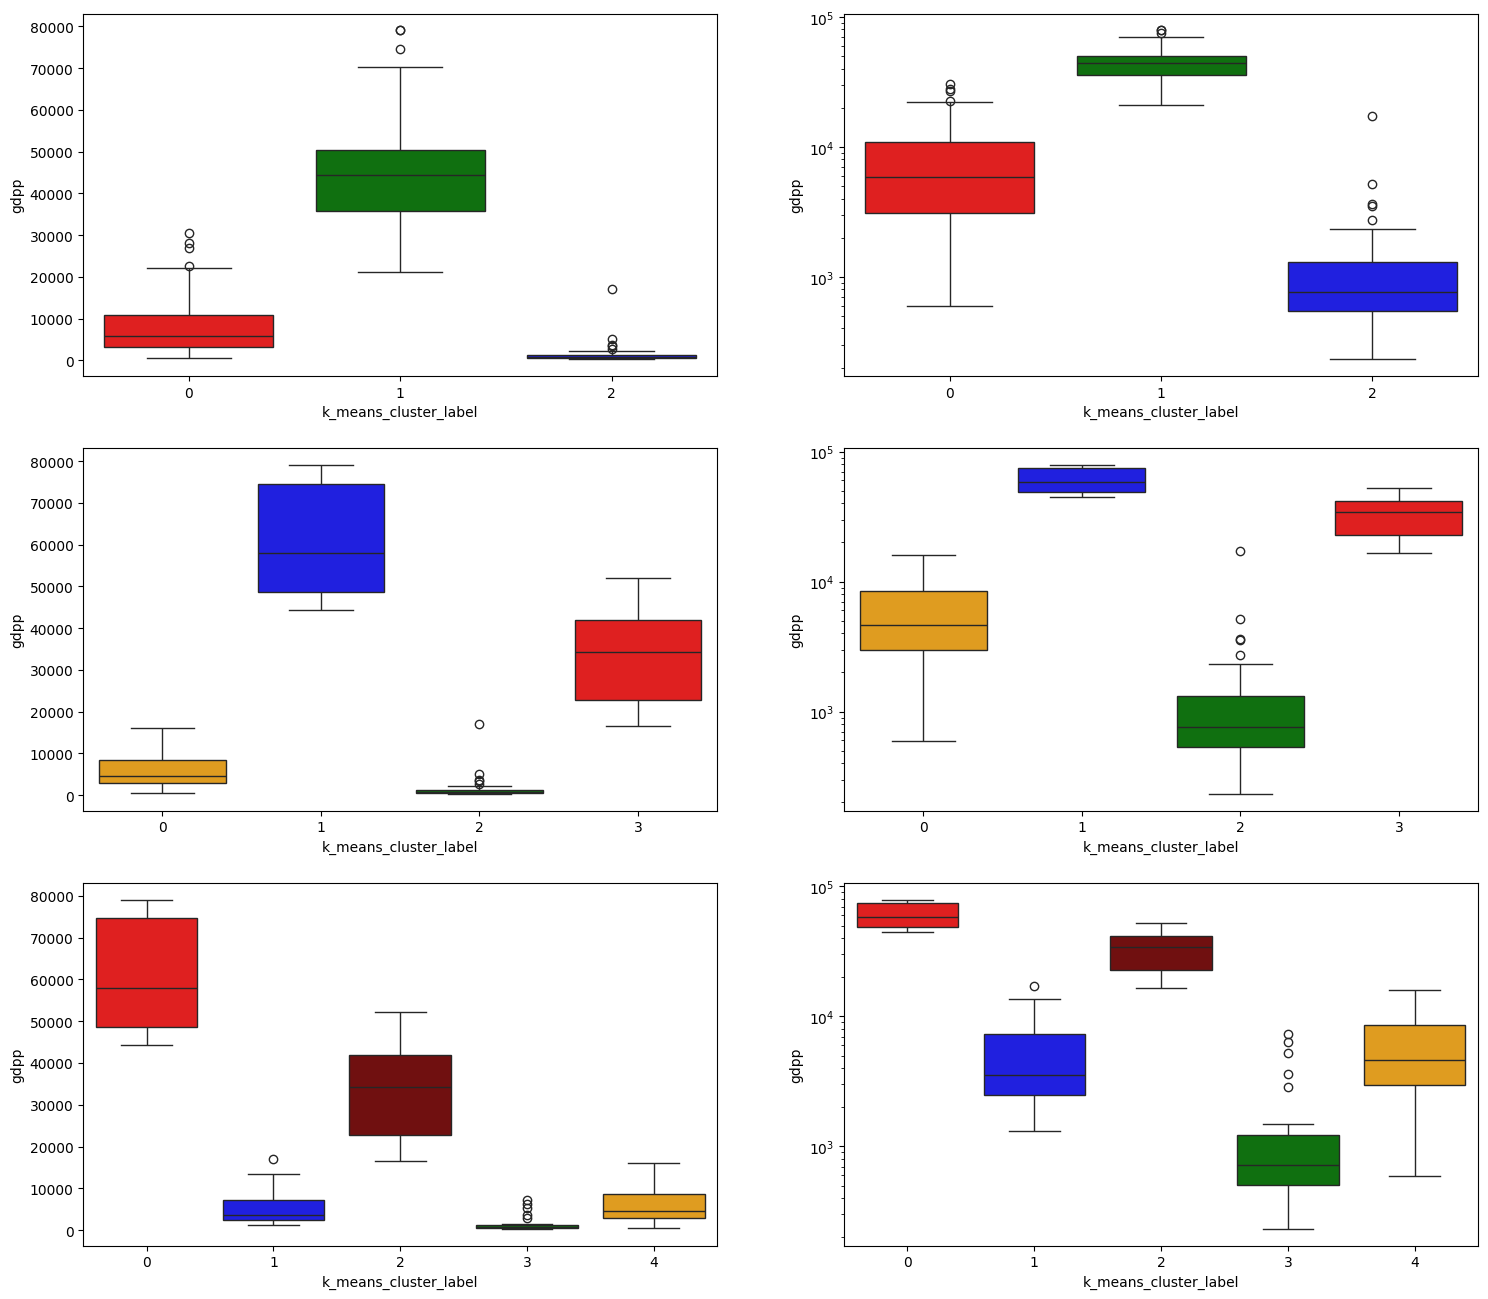

In [157]:
plt.figure(figsize = (18,16))
clusters_box_plots('gdpp',True) # log scaled
plt.show()

#Observations:

*   First set of 3 plots at the left show the distribution without log scale and the next 3 plots at the right show the distribution with GDPP log scaled

*   GDPP of the developed countries are so high that we are unable to see the GDPP of the poor countries properly in this boxplot.

*   From the right side 3 plots, it can be seen that GDPP of cluster 0 is in the range of 10000(10^4) and cluster 1 is in 100000(10^5) whereas cluster 2 is in range of 10^3 indicating help

*   There is a slight overlap in the clusters when k=5 and k=4


In [158]:
# Function for Profiling Clusters to plot boxen plots
def clusters_boxen_plots(column_name, logy=False):
    #plt.figure(figsize=(18,8))

    if logy:
        i=1
    else:
        i=0

    plt.subplot(2+i,2,1)
    sns.boxenplot(x = 'k_means_cluster_label', y = column_name, data = k_3_model, palette=['red','green','blue'])
    if logy:
        plt.subplot(3,2,2)
        sns.boxenplot(x = 'k_means_cluster_label', y = column_name, data = k_3_model, palette=['red','green','blue'])
        plt.yscale('log')

    plt.subplot(2+i,2,2+i)
    sns.boxenplot(x = 'k_means_cluster_label', y = column_name, data = k_4_model, palette=['orange', 'blue','green','red'])
    if logy:
        plt.subplot(3,2,4)
        sns.boxenplot(x = 'k_means_cluster_label', y = column_name, data = k_4_model, palette=['orange','blue','green','red'])
        plt.yscale('log')

    plt.subplot(2+i,2,3+i+i)
    sns.boxenplot(x = 'k_means_cluster_label', y = column_name, data = k_5_model, palette=['red','blue','maroon','green','orange'])
    if logy:
        plt.subplot(3,2,6)
        sns.boxenplot(x = 'k_means_cluster_label', y = column_name, data = k_5_model, palette=['red','blue','maroon','green','orange'])
        plt.yscale('log')

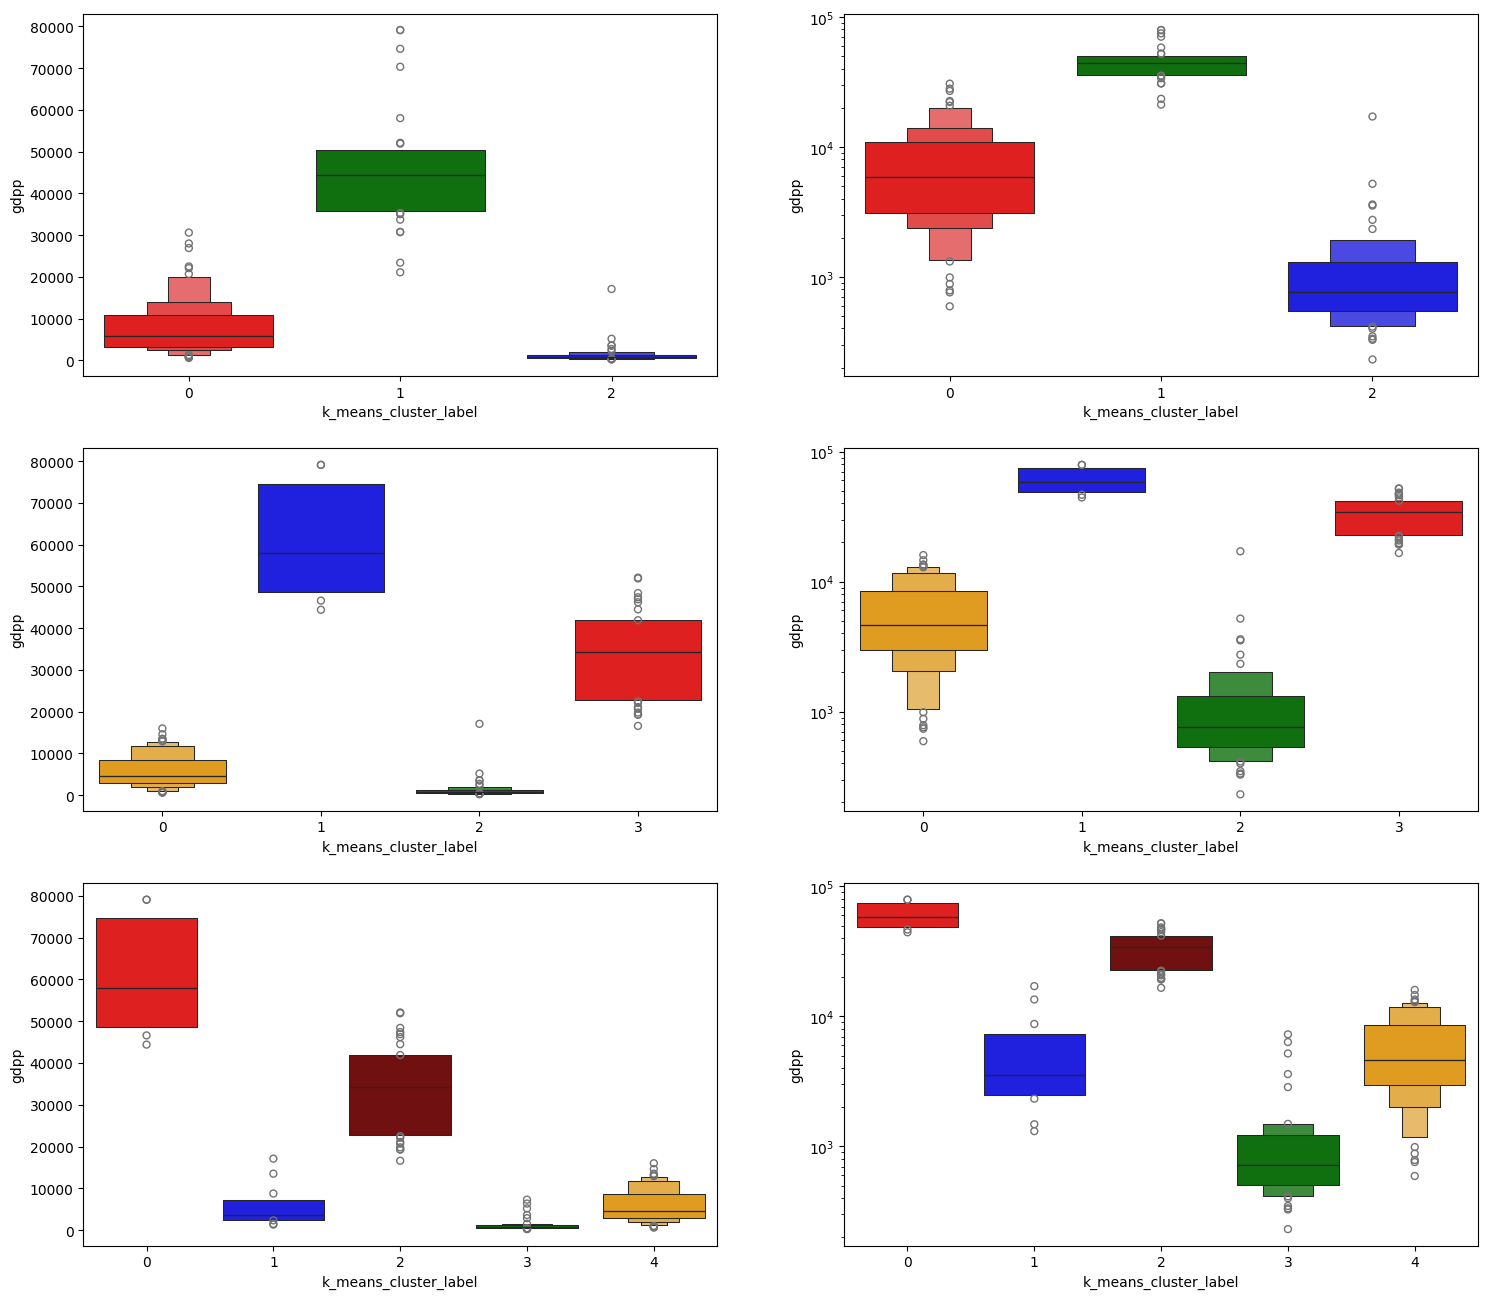

In [159]:
plt.figure(figsize = (18,16))
clusters_boxen_plots('gdpp',True) # log scaled
plt.show()

Visualization of Income distribution when k=3,4,5

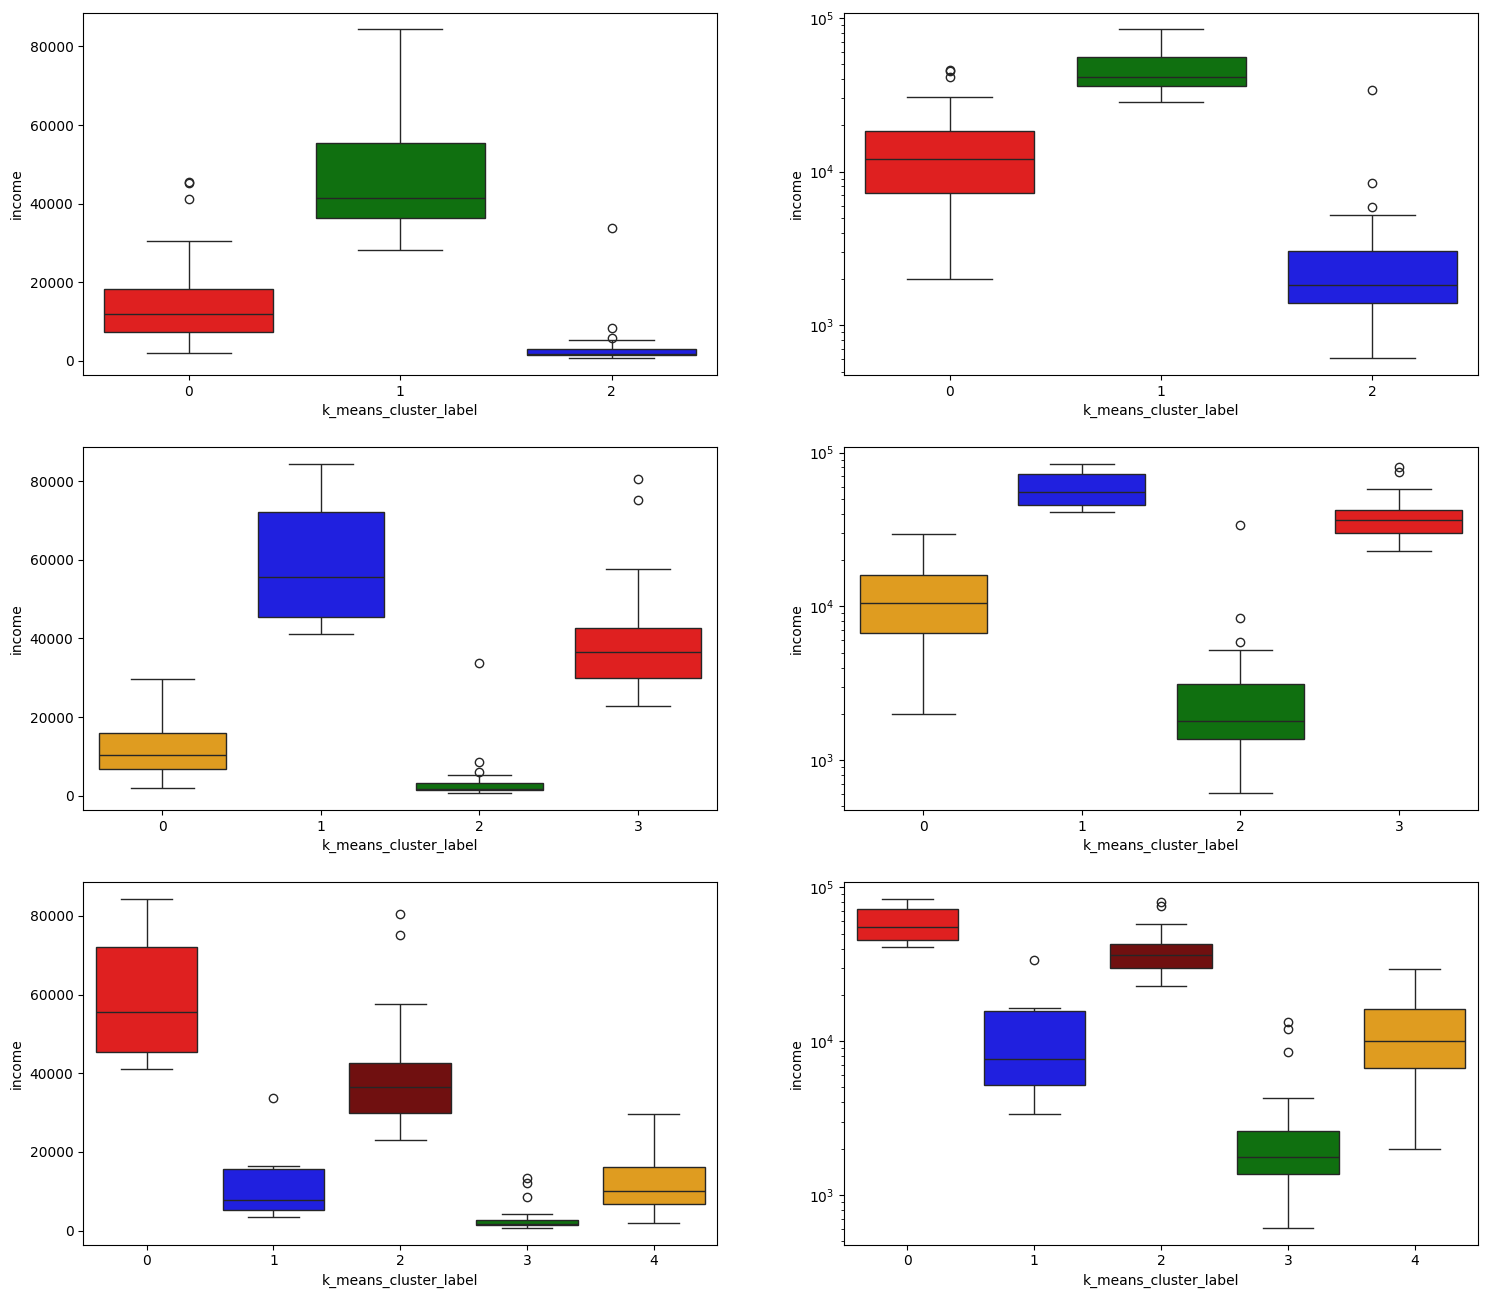

In [160]:
plt.figure(figsize = (18,16))
clusters_box_plots('income',True) # log scaled
plt.show()

#Observations:

*	Income follows the same pattern as that of GDPP.
*	The clusters are seggregated well when k=3 and slightly overlaps when k=4 and k=5
*	k=3 seems to be a good indicator of k as the cohesion within the cluster is good and clusters are well separated.


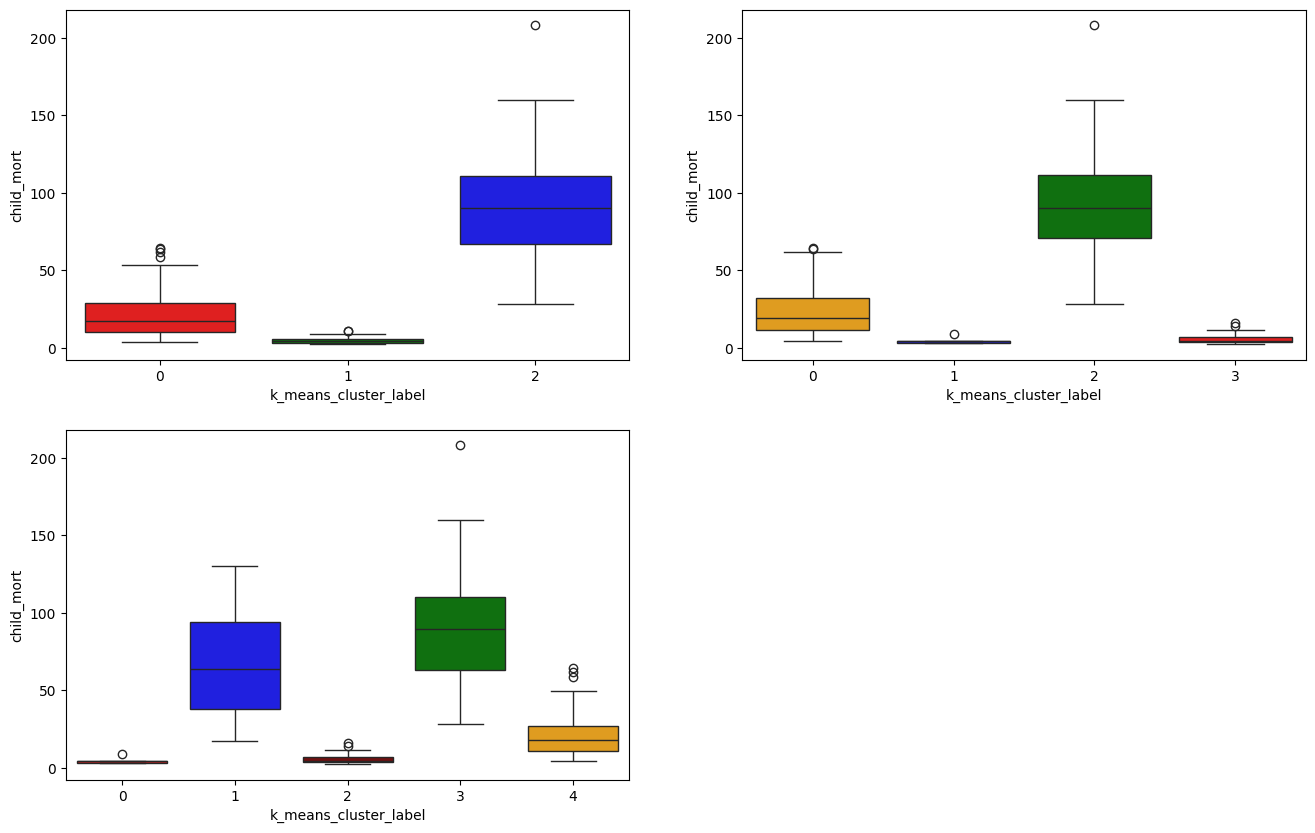

In [161]:
# Visualization of Child mortality distribution when k=3,4,5
plt.figure(figsize = (16,10))
clusters_box_plots('child_mort')
plt.show()

# Observations:

* Child mortality follows the opposite pattern of GDPP and income.
* Clusters which were high on GDPP and income have less child mortality, indicating that these countries have ample amount of money to take care of child mortaliy and health issues.
* We can see that k=3 gives good clusters as the cohesion within the cluster is good and clusters are well separated

<Figure size 1800x800 with 0 Axes>

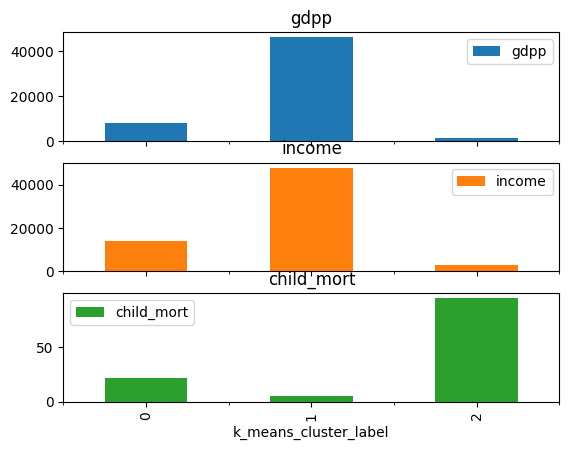

In [162]:
#Visualization of Mean of GDPP, income and Child mortality when k=3,4,5
plt.figure(figsize=(18,8))
grouped_df_k3 = k_3_model[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df_k3.plot.bar(subplots=True)
plt.show()

# Observations

When K=3, the clusters can be profiled as

* 0 : Medium GDPP, medium Income and mild child mortality rate.
* 1 : High GDPP, High income and very low child mortality rate.
* 2 : Low GDPP, Low income and very high mortality rate.

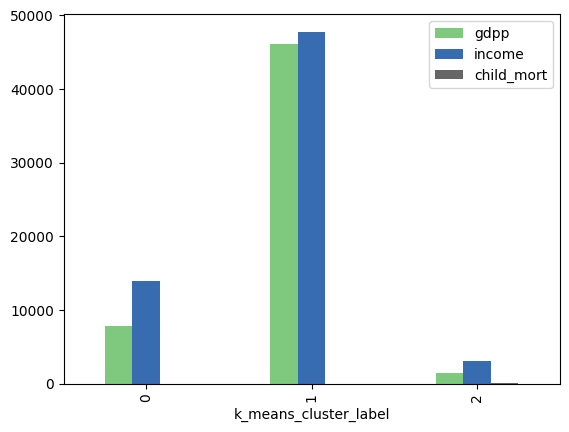

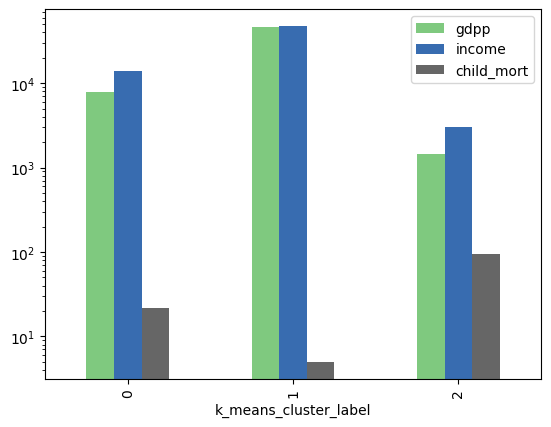

In [163]:
# Profiling GDP, INCOME AND CHID_MORT together

grouped_df_k3.plot(kind='bar', colormap='Accent')
grouped_df_k3.plot(kind='bar',logy=True, colormap='Accent')
plt.show()

This gives a very good inference about each cluster.

* 0 : Medium GDPP, medium Income and mild child mortality rate.
* 1 : High GDPP, High income and very low child mortality rate.
* 2 : Low GDPP, Low income and very high mortality rate and has to be focussed.

<Figure size 1800x800 with 0 Axes>

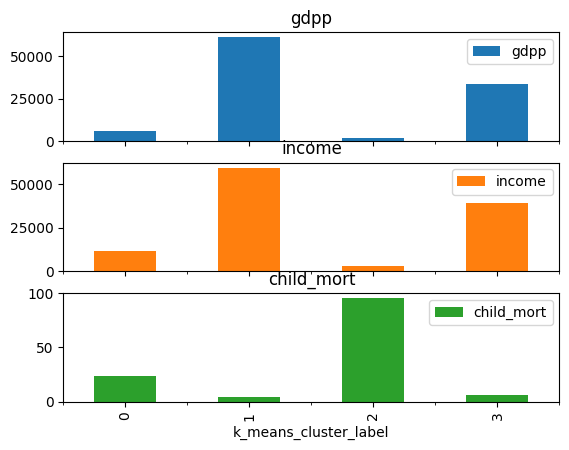

In [164]:
plt.figure(figsize=(18,8))
grouped_df_k4 = k_4_model[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df_k4.plot.bar(subplots=True)
plt.show()

When K=4, the clusters 1 and 2 are a bit similar and it seems to be in same cluster when k=3. Lets profile the clusters as

* 0 : Medium GDPP, medium Income and mild child mortality rate.
* 1 : High GDPP, High income and very low child mortality rate.
* 2 : Very high GDPP, Very high income and very low child mortality rate.
* 3 : Low GDPP, Low income and very high mortality rate

Since we are concerned about the countries not doing well, this granular seggregation of countries doing well is not of our primary concern.

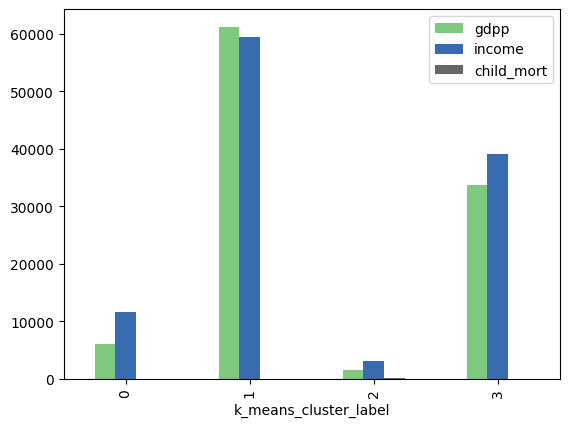

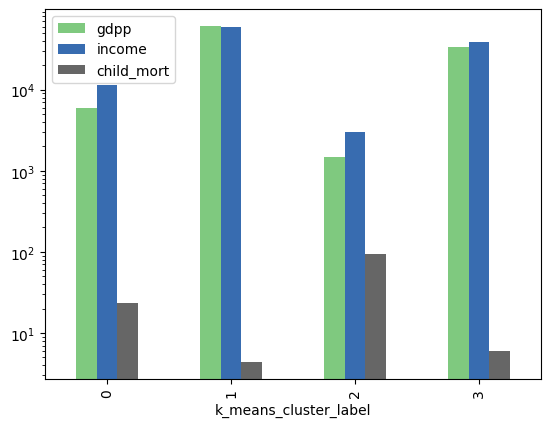

In [165]:
# Profiling GDP, INCOME AND CHID_MORT together
grouped_df_k4.plot(kind='bar', colormap='Accent')
grouped_df_k4.plot(kind='bar',logy=True, colormap='Accent')
plt.show()

# Observations:

Not much of difference between clusters 2 and 1 and these can be represented in a single cluster leading to k=3 being a good number

<Figure size 1800x800 with 0 Axes>

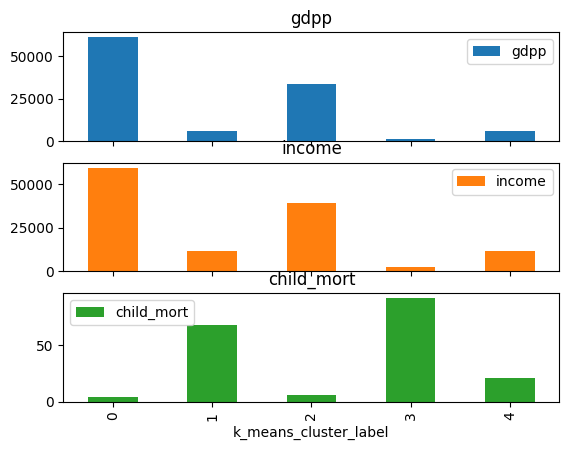

In [166]:
plt.figure(figsize=(18,8))
grouped_df_k5 = k_5_model[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df_k5.plot.bar(subplots=True)
plt.show()

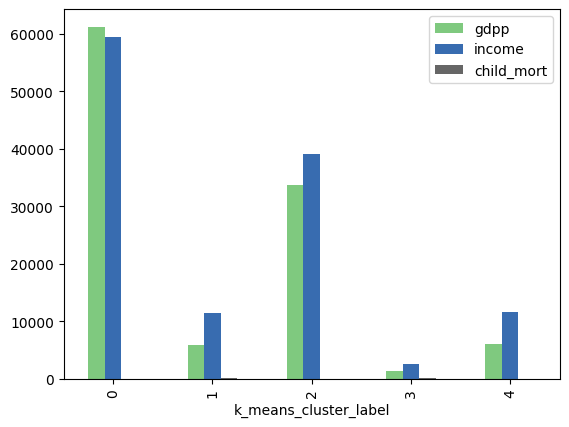

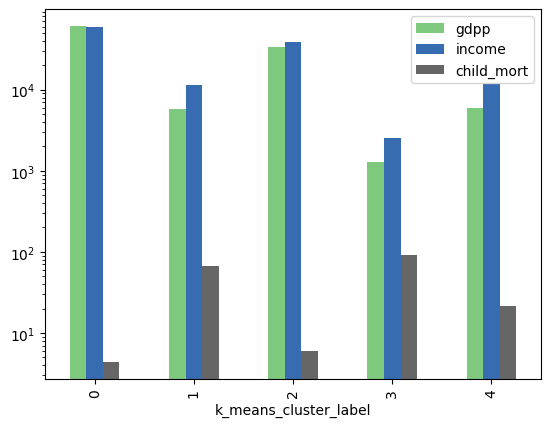

In [167]:
# Profiling GDP, INCOME AND CHID_MORT together
grouped_df_k5.plot(kind='bar', colormap='Accent')
grouped_df_k5.plot(kind='bar',logy=True, colormap='Accent')
plt.show()

# Observations

When K=5, we saw that there was only one country in cluster 4.

* Clusters 1 and 3 are similar
* Cluster 0 and 4 are also similar.
Our concern is on clusters 2 and 3. But if they are spread across clusters, its difficult to find which country needs the aid at most than the other.

So lets go with k=3 as optimal number of clusters.

In [168]:
kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df_scaled)

KMeans(n_clusters=3, random_state=50)

Creating Cluster labels using K-means

Since scaled data will be a bit confusing while explaining to business people, we will copy the actual data into a new dataframe to explain the cluster labels. We will use this country_df_kmean_3 for cluster profiling.

Lets create a column called k_means_cluster_label and concatenate to the country_df_kmean_3 to assign the countries with the cluster labels.

In [169]:
df_kmean = df.copy() # copy df into new df, as the same df will be used for hierarchical clustering too.
label  = pd.DataFrame(kmean.labels_, columns= ['k_means_cluster_label'])
label.head()

,k_means_cluster_label
0,1
1,2
2,2
3,1
4,2


In [170]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Exports_Imports_Ratio,k_means_cluster_label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0.222717,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0.576132,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1.222930,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1.452214,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0.772496,2


In [171]:
df_kmean.k_means_cluster_label.value_counts()

,count
k_means_cluster_label,
2,95
1,45
0,27




* value_counts shows how many countries are clustered under each cluster label.
* Lets analyse these 3 clusters and see if we can profile these clusters by comparing their gdpp, child_mort, income
* Lets visualize these clusters using scatter plots, barplots and boxplots
* We also need to analyse the clusters and see if k=3 helps us to identify the countries which are in dire need of aid

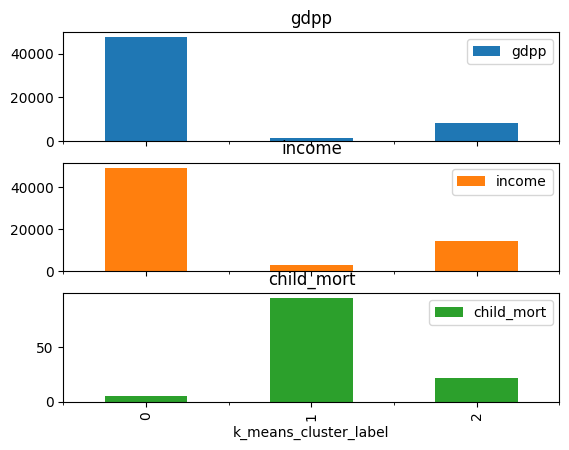

In [172]:
# Profiling GDP, INCOME AND CHID_MORT in separate plots

grouped_df = df_kmean[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df.plot.bar(subplots=True)
plt.show()

<Axes: xlabel='k_means_cluster_label'>

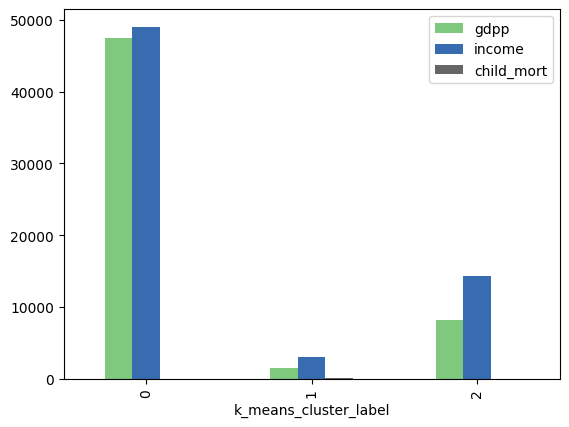

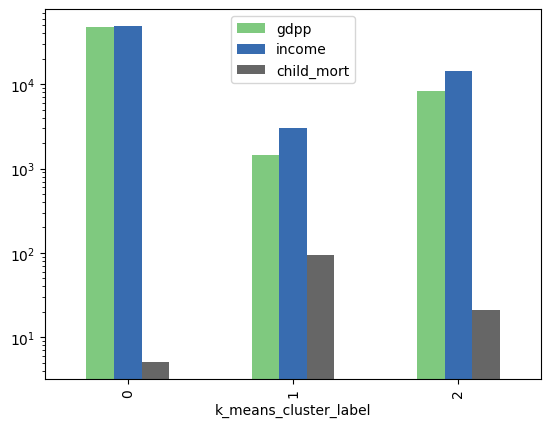

In [173]:
# Profiling GDP, INCOME AND CHID_MORT together
grouped_df.plot(kind='bar', colormap='Accent')
grouped_df.plot(kind='bar',logy=True, colormap='Accent')

# INFERENCES:

From the above three plots, We can see that the clusters are grouped as

* 0 : Medium GDPP, medium Income and mild child mortality rate.
* 1 : High GDPP, High income and very low child mortality rate.
* 2 : Low GDPP, Low income and very high mortality rate.

Countrries Segmentations

Based on above inference We can rename the labels for better business understanding as cluster label 0, 1 and 2 does not make sense to interpret. Then we will perform the cluster profiling with new labels.

Lets rename the cluster labesl as

* 1 : Developing Countries
* 0 : Developed Countries
* 2 : Under-developed Countries

This would help the NGO to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries and focus on Cluster 2: Under-developed Countries

In [174]:
# Medium income, Medium GDP and Slightly high Child_mort
# Filter the data for that clsuter

df_kmean.loc[df_kmean['k_means_cluster_label'] == 1,'k_means_cluster_label'] ='Developing Countries'
df_kmean[df_kmean['k_means_cluster_label'] == 'Developing Countries']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Exports_Imports_Ratio,k_means_cluster_label
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.8200,553.0,0.222717,Developing Countries
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,1.452214,Developing Countries
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.3600,758.0,0.639785,Developing Countries
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,0.648649,Developing Countries
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,0.227551,Developing Countries
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.1100,1310.0,0.822222,Developing Countries
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,0.445283,Developing Countries
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,0.845977,Developing Countries
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.7500,769.0,0.319149,Developing Countries
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.5400,334.0,0.828629,Developing Countries


In [175]:
df_kmean[df_kmean['k_means_cluster_label'] == 'Developing Countries'].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Exports_Imports_Ratio
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,94.286667,680.724022,82.066558,704.207311,3017.400000,11.905889,59.368889,5.068160,1455.555556,0.664074
std,33.654384,2205.774020,124.403993,1527.247339,4938.806253,15.817698,6.600442,0.920679,2577.881976,0.364344
min,28.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,3.150000,231.000000,0.079137
25%,66.800000,101.745000,31.977800,192.544000,1390.000000,3.870000,56.800000,4.600000,547.000000,0.423295
50%,90.300000,161.424000,45.932500,302.802000,1820.000000,8.790000,60.100000,5.110000,758.000000,0.642612
75%,111.000000,393.000000,67.858000,528.260000,3060.000000,16.100000,62.800000,5.710000,1310.000000,0.822222
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,6.563600,17100.000000,1.555759


These statstics shows that variations are not very high, also mean and median are close so this cluser also looks ok. Let's check other clusters.

In [176]:
# Developed Countries: High income, High GDP and Low Child_mort
# Filter the data for that clsuter
df_kmean.loc[df_kmean['k_means_cluster_label'] == 0,'k_means_cluster_label'] ='Developed Countries'
df_kmean[df_kmean['k_means_cluster_label'] == 'Developed Countries']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Exports_Imports_Ratio,k_means_cluster_label
7,Australia,4.8,10276.20,4530.8700,10847.10,41400.0,1.160,82.0,1.93,51900.0,0.947368,Developed Countries
8,Austria,4.3,24059.70,5159.0000,22418.20,43200.0,0.873,80.5,1.44,46900.0,1.073222,Developed Countries
15,Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,1.022758,Developed Countries
23,Brunei,10.5,23792.20,1002.5200,9884.00,80600.0,16.700,77.1,1.84,35300.0,2.407143,Developed Countries
29,Canada,5.6,13793.40,5356.2000,14694.00,40700.0,2.870,81.3,1.63,47400.0,0.938710,Developed Countries
42,Cyprus,3.6,15461.60,1838.7600,17710.00,33900.0,2.010,79.9,1.42,30800.0,0.873043,Developed Countries
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,1.158257,Developed Countries
53,Finland,3.0,17879.40,4134.9000,17278.80,39800.0,0.351,80.0,1.87,46200.0,1.034759,Developed Countries
54,France,4.2,10880.80,4831.4000,11408.60,36900.0,1.050,81.4,2.03,40600.0,0.953737,Developed Countries
58,Germany,4.2,17681.40,4848.8000,15507.80,40400.0,0.758,80.1,1.39,41800.0,1.140162,Developed Countries


In [177]:
df_kmean[df_kmean['k_means_cluster_label'] == 'Developed Countries'].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Exports_Imports_Ratio
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,5.092593,26440.026667,4363.327807,22045.851111,49057.333333,3.120407,80.462963,1.775185,47476.888889,1.224252
std,2.319470,16535.307518,2290.539971,13644.366817,16604.947131,4.399902,1.540017,0.293380,14286.719313,0.449973
min,2.600000,6001.600000,1002.520000,6052.000000,28300.000000,-3.220000,76.500000,1.150000,21100.000000,0.784810
25%,3.400000,12381.600000,2624.530000,11556.300000,37850.000000,0.803000,79.950000,1.490000,38700.000000,0.973622
50%,4.300000,24059.700000,4475.530000,17710.000000,42900.000000,1.570000,80.500000,1.870000,46200.000000,1.132075
75%,5.900000,34389.100000,5257.600000,28639.400000,56550.000000,3.780000,81.450000,1.965000,51100.000000,1.211224
max,10.800000,64794.260000,8410.330400,55371.390000,84374.000000,16.700000,82.800000,2.210000,79088.000000,2.617647


These statstics shows that variations are not very high and mean and median are close to each other so this cluser looks ok. Let's check cluster of under developed countries.

In [178]:
# Under-Developed Countries:Low income, Low GDP and High Child_mort
# Filter the data for that clsuter

df_kmean.loc[df_kmean['k_means_cluster_label'] == 2,'k_means_cluster_label'] ='Under-Developed Countries'
df_kmean[df_kmean['k_means_cluster_label'] == 'Under-Developed Countries']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Exports_Imports_Ratio,k_means_cluster_label
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.49,76.3,1.65,4090.0,0.576132,Under-Developed Countries
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.10,76.5,2.89,4460.0,1.222930,Under-Developed Countries
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.44,76.8,2.13,12200.0,0.772496,Under-Developed Countries
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.90,75.8,2.37,10300.0,1.181250,Under-Developed Countries
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.77,73.3,1.69,3220.0,0.459161,Under-Developed Countries
...,...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,3129.70,993.650,3022.60,17100.0,4.91,76.4,2.08,11900.0,1.035433,Under-Developed Countries
161,Uzbekistan,36.3,437.46,80.178,393.30,4240.0,16.50,68.8,2.34,1380.0,1.112281,Under-Developed Countries
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950.0,2.62,63.0,3.50,2970.0,0.884250,Under-Developed Countries
163,Venezuela,17.1,3847.50,662.850,2376.00,16500.0,45.90,75.4,2.47,13500.0,1.619318,Under-Developed Countries


In [179]:
df_kmean[df_kmean['k_means_cluster_label'] == 'Under-Developed Countries'].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Exports_Imports_Ratio
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,21.165263,3656.511227,574.206947,3725.118664,14261.894737,7.153158,73.038947,2.266947,8242.252632,0.960156
std,15.050544,3692.080029,612.095079,3409.954770,9243.311244,7.750844,4.927826,0.726867,6996.918217,0.413692
min,3.200000,1.076920,19.463600,0.651092,1990.000000,-4.210000,54.300000,1.230000,592.000000,0.205638
25%,10.300000,1059.185000,187.791500,1429.550000,7325.000000,1.755000,70.350000,1.600000,3165.000000,0.715307
50%,17.400000,2082.080000,375.596000,2364.930000,12700.000000,5.440000,74.000000,2.170000,6030.000000,0.906780
75%,28.200000,5064.300000,728.420000,5118.800000,18900.000000,9.395000,76.350000,2.655000,11250.000000,1.093454
max,64.400000,15046.200000,2928.780000,14718.600000,45400.000000,45.900000,81.900000,4.560000,30700.000000,3.052910


The small variation and close mean and median indicate strong clustering.

The stats of this cluster differ significantly from previous ones, showing good cohesion and separation.

With clearly labelled clusters, interpreting plots is easier. Next, we will profile the clusters using the new labels.



Cluster Profiling

In [180]:
profiling_cols = ['gdpp','child_mort','income']

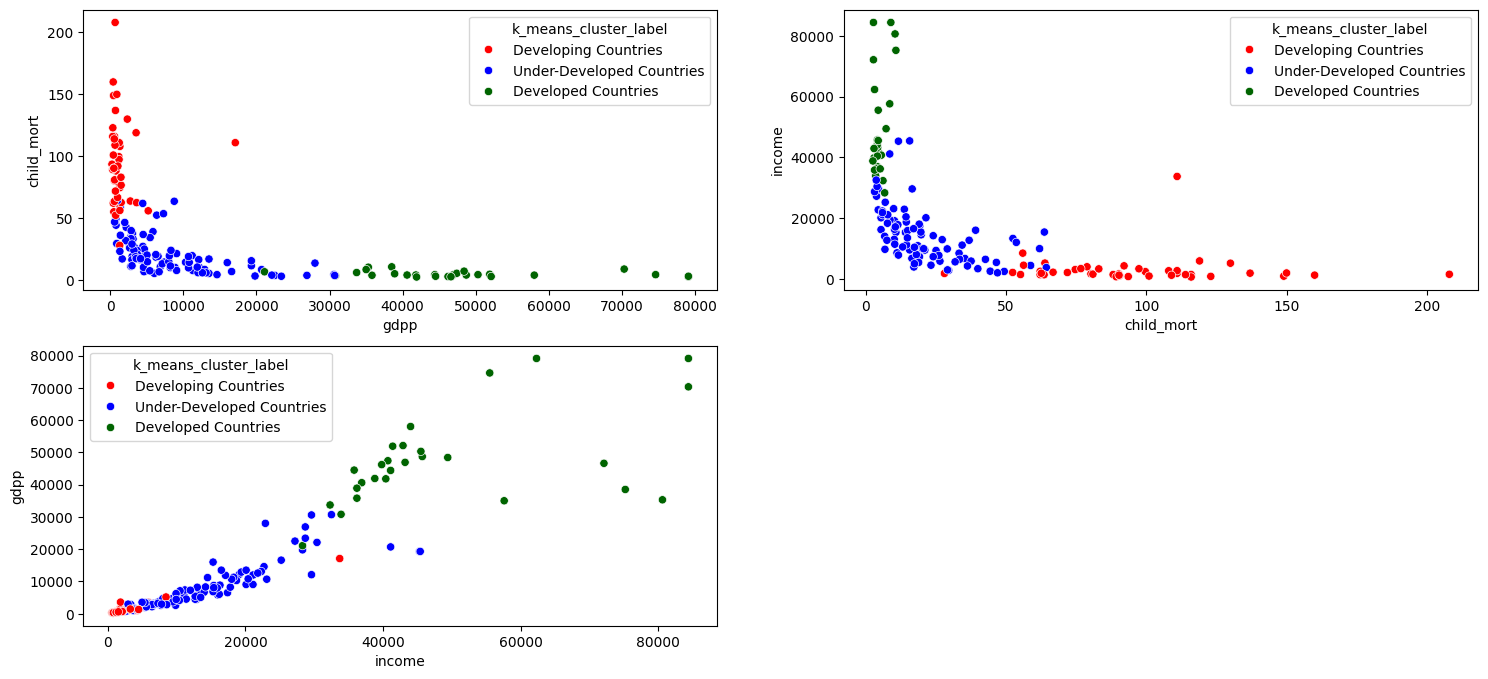

In [181]:
# Plot the cluster
plt.figure(figsize=(18,8))
i=0
for i in range(len(profiling_cols)):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x = profiling_cols[i], y = profiling_cols[(i+1)%len(profiling_cols)], hue = 'k_means_cluster_label', data = df_kmean, palette=['red','blue','darkgreen'])

Inferences:

These new labels help us to interpret the plots in a better fashion. We can see that

* Developing countries have Medium GDPP, medium Income and mild child mortality rate.
* Developed countries have High GDPP, High income and very low child mortality rate.
* Under-Developed countries have Low GDPP, Low income and very high mortality rate and should be our primary focus.

<Figure size 1800x800 with 0 Axes>

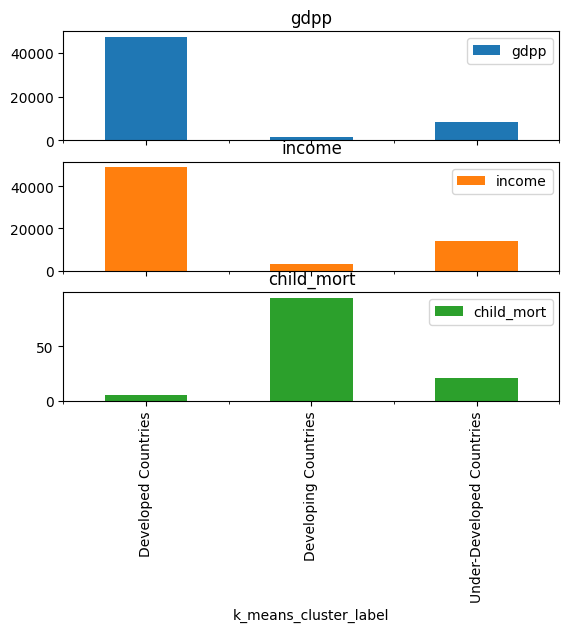

In [182]:
# Profiling GDP, INCOME AND CHID_MORT in sub-plots
plt.figure(figsize=(18,8))
grouped_df = df_kmean[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df.plot.bar(subplots=True)
plt.show()

In [183]:
top_5_underdeveloped = df_kmean[df_kmean['k_means_cluster_label'] == 'Under-Developed Countries'].sort_values(by = ['gdpp','income','child_mort'],
                                                     ascending=[True, True, False]).head(5)

In [184]:
top_5_underdeveloped

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Exports_Imports_Ratio,k_means_cluster_label
109,Nepal,47.0,56.71360,31.0800,215.488000,1990.0,15.10,68.3,2.61,592.0,0.263187,Under-Developed Countries
12,Bangladesh,49.4,121.28000,26.6816,165.244000,2440.0,7.14,70.4,2.33,758.0,0.733945,Under-Developed Countries
27,Cambodia,44.4,425.22600,44.6448,467.670000,2520.0,3.12,66.1,2.88,786.0,0.909244,Under-Developed Countries
83,Kyrgyz Republic,29.6,454.08000,54.3840,718.960000,2790.0,10.00,68.5,3.10,880.0,0.631579,Under-Developed Countries
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720.0,7.04,66.8,2.41,988.0,1.654021,Under-Developed Countries


Observations:

Top 5 undeveloped countries based on KMean cluster are: ['Burundi' 'Liberia' 'Congo, Dem. Rep.' 'Niger' 'Sierra Leone']



# Hierarchical Clustering

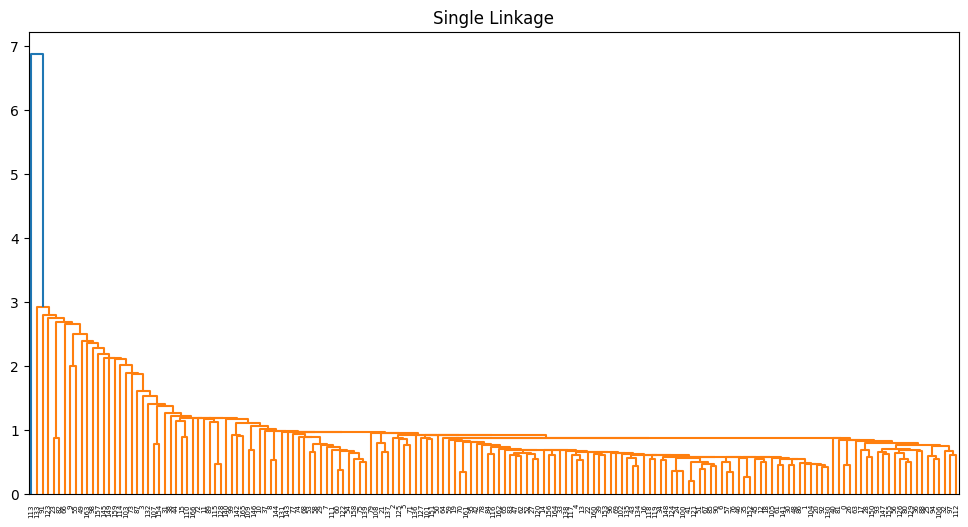

In [185]:
# Single Linkage
mergings = linkage(df_scaled, method="single", metric='euclidean')
plt.figure(figsize=(12,6))
dendrogram(mergings)
plt.title('Single Linkage')
plt.show()

Observations

The clusters of the single linkage are not truly satisfying. The single linkage method appears to be making clusters having sigle countries.

As single linkage didn't produce a good enough result for us to analyse the clusters. Hence, we need to go ahead and utilise the complete linkage method and then analyse the clusters once again.

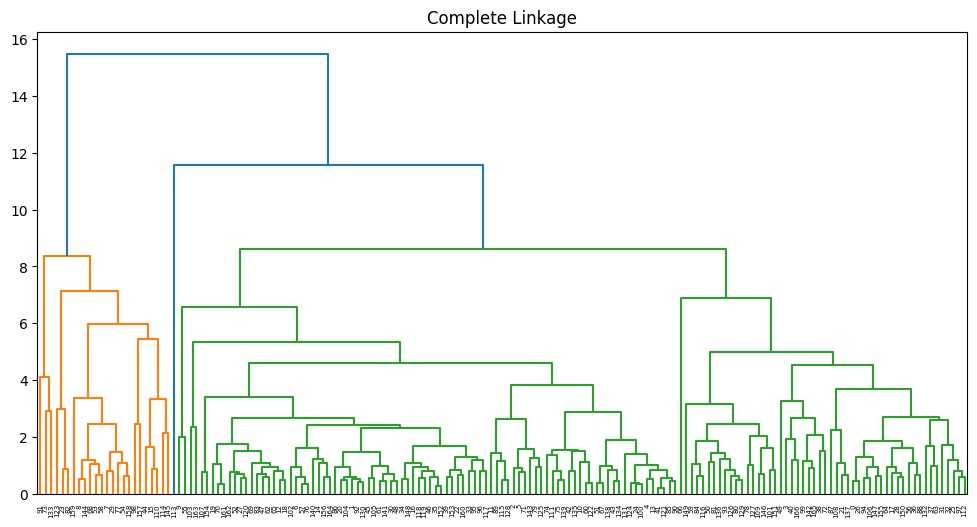

In [186]:
# complete linkage
mergings = linkage(df_scaled, method="complete", metric='euclidean')
plt.figure(figsize=(12,6))
dendrogram(mergings)
plt.title('Complete Linkage')
plt.show()

Observations:

* From the above Dendrograms, it is evident that 'Complete Linkage' give a better cluster formation compared to single linkage method.

* So we will use Complete linkage output for our further analysis.

* We could see 3 clusters fom the above dendogram

In [187]:
# labeling 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [188]:
# assign cluster labels
df['H_ClusterID'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Exports_Imports_Ratio,H_ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0.222717,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0.576132,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1.222930,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1.452214,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0.772496,0


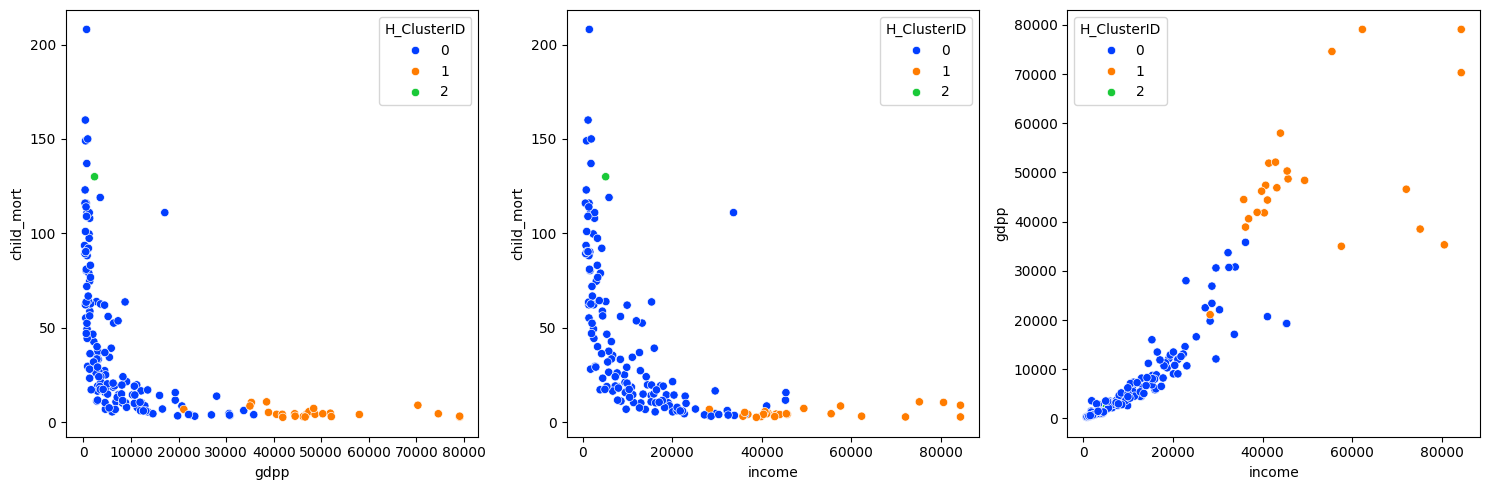

In [189]:
# visualising clusters
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data= df, hue = 'H_ClusterID', palette="bright" )

plt.subplot(1,3,2)
sns.scatterplot(x = 'income', y = 'child_mort', data= df, hue = 'H_ClusterID', palette="bright" )

plt.subplot(1,3,3)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x = 'income', y = 'gdpp', data= df, hue = 'H_ClusterID',palette="bright")

plt.tight_layout()
plt.show()

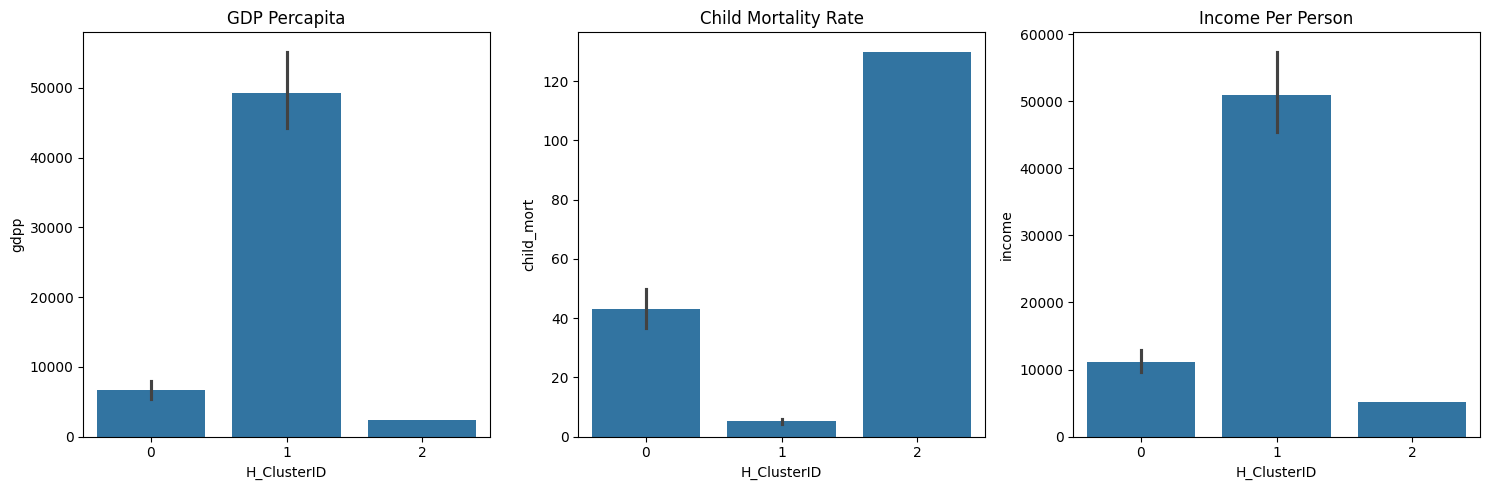

In [190]:
# visualising clusters
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x = 'H_ClusterID', y = 'gdpp', data= df)
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.barplot(x = 'H_ClusterID', y = 'child_mort', data= df)
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.barplot(x = 'H_ClusterID', y = 'income', data= df)
plt.title('Income Per Person')

plt.tight_layout()

plt.show()

Observations:

In th scatter plot the clusters are clearly visible From the bar plot of clusters we could see that,

* Cluster 0 : Undeveloped
* Cluster 1: Developing
* Cluste 2 : Developed

We are intrested on cluster 0 as objective is to find top 5 undevelped countries

In [191]:
# sort based on 'child_mort','income','gdpp' in respective order
H_cluster_Undeveloped = df[df['H_ClusterID']== 0]
H_top5 = H_cluster_Undeveloped.sort_values(by = ['gdpp','income','child_mort'],
                                                     ascending=[True, True, False]).head(5)

print( 'Top 5 countries dire need of aid  based on H cluster are:' , H_top5['country'].values )

Top 5 countries dire need of aid  based on H cluster are: ['Burundi' 'Liberia' 'Congo, Dem. Rep.' 'Niger' 'Sierra Leone']


From Hierarchical Clusturing we could get top 5 undeveloped countries are:

'Burundi' 'Liberia' 'Congo, Dem. Rep.' 'Niger' 'Sierra Leone'

# Model Selction

In [192]:
df_kmean.k_means_cluster_label.value_counts()

,count
k_means_cluster_label,
Under-Developed Countries,95
Developing Countries,45
Developed Countries,27


In [193]:
# Low income, Low GDP and High Child_mort
# Filter the data for that clsuter

df.loc[df['H_ClusterID'] == 0,'H_Cluster_label'] ='Under-Developed Countries'
df[df['H_Cluster_label'] == 'Under-Developed Countries']




,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Exports_Imports_Ratio,H_ClusterID,H_Cluster_label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0.222717,0,Under-Developed Countries
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0.576132,0,Under-Developed Countries
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1.222930,0,Under-Developed Countries
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1.452214,0,Under-Developed Countries
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0.772496,0,Under-Developed Countries
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.62,63.0,3.50,2970.0,0.884250,0,Under-Developed Countries
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,45.90,75.4,2.47,13500.0,1.619318,0,Under-Developed Countries
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.10,73.1,1.95,1310.0,0.897756,0,Under-Developed Countries
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.60,67.5,4.67,1310.0,0.872093,0,Under-Developed Countries


In [194]:
# Medium income, Medium GDP and Mild Child_mort
# Filter the data for that clsuter

df.loc[df['H_ClusterID'] == 1,'H_Cluster_label'] ='Developing Countries'
df[df['H_Cluster_label'] == 'Developing Countries']


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Exports_Imports_Ratio,H_ClusterID,H_Cluster_label
7,Australia,4.8,10276.20,4530.8700,10847.10,41400.0,1.160,82.0,1.93,51900.0,0.947368,1,Developing Countries
8,Austria,4.3,24059.70,5159.0000,22418.20,43200.0,0.873,80.5,1.44,46900.0,1.073222,1,Developing Countries
15,Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,1.022758,1,Developing Countries
23,Brunei,10.5,23792.20,1002.5200,9884.00,80600.0,16.700,77.1,1.84,35300.0,2.407143,1,Developing Countries
29,Canada,5.6,13793.40,5356.2000,14694.00,40700.0,2.870,81.3,1.63,47400.0,0.938710,1,Developing Countries
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,1.158257,1,Developing Countries
53,Finland,3.0,17879.40,4134.9000,17278.80,39800.0,0.351,80.0,1.87,46200.0,1.034759,1,Developing Countries
54,France,4.2,10880.80,4831.4000,11408.60,36900.0,1.050,81.4,2.03,40600.0,0.953737,1,Developing Countries
58,Germany,4.2,17681.40,4848.8000,15507.80,40400.0,0.758,80.1,1.39,41800.0,1.140162,1,Developing Countries
68,Iceland,2.6,22374.60,3938.6000,18142.70,38800.0,5.470,82.0,2.20,41900.0,1.233256,1,Developing Countries


In [195]:
# High income, High GDP and Low Child_mort
# Filter the data for that clsuter

df.loc[df['H_ClusterID'] == 2,'H_Cluster_label'] ='Developed Countries'
df[df['H_Cluster_label'] == 'Developed Countries']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Exports_Imports_Ratio,H_ClusterID,H_Cluster_label
113,Nigeria,130.0,589.49,118.131,405.42,5150.0,104.0,60.5,5.84,2330.0,1.454023,2,Developed Countries


In [196]:
# No of countries in Each Distribution

H_cluster_count = df.H_ClusterID.value_counts()
print('Cluster wise No of Countries (Hierarchical Clustering):')
print(H_cluster_count)

K_cluster_count = df_kmean.k_means_cluster_label.value_counts()
print('\nCluster wise No of Countries (KMean Clustering):')
print(K_cluster_count)

Cluster wise No of Countries (Hierarchical Clustering):
H_ClusterID
0    142
1     24
2      1
Name: count, dtype: int64

Cluster wise No of Countries (KMean Clustering):
k_means_cluster_label
Under-Developed Countries    95
Developing Countries         45
Developed Countries          27
Name: count, dtype: int64


In [197]:
# Get the % of cluster distribution
H_cluster_per = df.H_ClusterID.value_counts(normalize = True)*100
print('Cluster wise Countries % (Hierarchical Clustering):')
print(round(H_cluster_per,2))

K_cluster_per = df_kmean.k_means_cluster_label.value_counts(normalize = True)*100
print('\nCluster wise Countries % (KMean Clustering):')
print(round(K_cluster_per,2))

Cluster wise Countries % (Hierarchical Clustering):
H_ClusterID
0    85.03
1    14.37
2     0.60
Name: proportion, dtype: float64

Cluster wise Countries % (KMean Clustering):
k_means_cluster_label
Under-Developed Countries    56.89
Developing Countries         26.95
Developed Countries          16.17
Name: proportion, dtype: float64


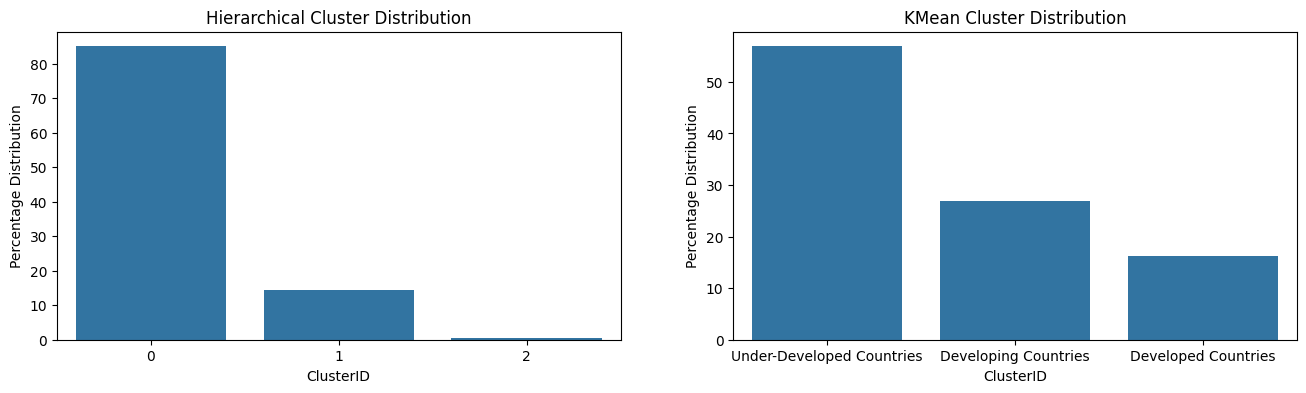

In [198]:
# barplot for cluster distribution
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.barplot(x= H_cluster_per.index, y = H_cluster_per)
plt.title('Hierarchical Cluster Distribution')
plt.xlabel('ClusterID')
plt.ylabel('Percentage Distribution')

plt.subplot(1,2,2)
sns.barplot(x= K_cluster_per.index, y = K_cluster_per)
plt.title('KMean Cluster Distribution')
plt.xlabel('ClusterID')
plt.ylabel('Percentage Distribution')
plt.show()

In [199]:
H_top10 = df[df['H_Cluster_label'] =='Under-Developed Countries'].sort_values(by = ['gdpp','child_mort','income'], ascending = [True, False, True]).head(10)
H_top10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Exports_Imports_Ratio,H_ClusterID,H_Cluster_label
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,0.227551,0,Under-Developed Countries
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,0.206263,0,Under-Developed Countries
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,0.828629,0,Under-Developed Countries
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,0.452138,0,Under-Developed Countries
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0.486957,0,Under-Developed Countries
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.6000,413.0,0.581395,0,Under-Developed Countries
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,0.681818,0,Under-Developed Countries
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0.445283,0,Under-Developed Countries
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.3100,459.0,0.653295,0,Under-Developed Countries
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.6100,482.0,0.205579,0,Under-Developed Countries


In [200]:
H_top10.country

,country
26,Burundi
88,Liberia
37,"Congo, Dem. Rep."
112,Niger
132,Sierra Leone
93,Madagascar
106,Mozambique
31,Central African Republic
94,Malawi
50,Eritrea


In [201]:
K_top10 = df_kmean[df_kmean['k_means_cluster_label'] =='Under-Developed Countries'].sort_values(['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)
K_top10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Exports_Imports_Ratio,k_means_cluster_label
109,Nepal,47.0,56.71360,31.0800,215.488000,1990.0,15.10,68.3,2.61,592.0,0.263187,Under-Developed Countries
12,Bangladesh,49.4,121.28000,26.6816,165.244000,2440.0,7.14,70.4,2.33,758.0,0.733945,Under-Developed Countries
27,Cambodia,44.4,425.22600,44.6448,467.670000,2520.0,3.12,66.1,2.88,786.0,0.909244,Under-Developed Countries
83,Kyrgyz Republic,29.6,454.08000,54.3840,718.960000,2790.0,10.00,68.5,3.10,880.0,0.631579,Under-Developed Countries
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720.0,7.04,66.8,2.41,988.0,1.654021,Under-Developed Countries
164,Vietnam,23.3,943.20000,89.6040,1050.620000,4490.0,12.10,73.1,1.95,1310.0,0.897756,Under-Developed Countries
69,India,58.8,305.10000,54.6750,365.850000,4410.0,8.98,66.2,2.60,1350.0,0.833948,Under-Developed Countries
161,Uzbekistan,36.3,437.46000,80.1780,393.300000,4240.0,16.50,68.8,2.34,1380.0,1.112281,Under-Developed Countries
102,Moldova,17.2,638.96000,190.7100,1279.550000,3910.0,11.10,69.7,1.27,1630.0,0.499363,Under-Developed Countries
19,Bolivia,46.6,815.76000,95.8320,679.140000,5410.0,8.78,71.6,3.20,1980.0,1.201166,Under-Developed Countries


In [202]:
K_top10.country

,country
109,Nepal
12,Bangladesh
27,Cambodia
83,Kyrgyz Republic
107,Myanmar
164,Vietnam
69,India
161,Uzbekistan
102,Moldova
19,Bolivia


In [203]:
list(K_top10.country)==list(H_top10.country)

False

This indicates both K-means and Hierarchical Clustering returned same list of 10 countries which are in need of aid.

We can chose final suggestions based on K-means clustering as the similarity within a cluster and dissimilarity across clusters is good in this methodology as can be seen from the summary statistics after segmentation. Also in K-means clustering, we have got around 48 countries in under developed countries clusters and hence it looks like better clustering mechanism.

Lets break this into two lists as top5 in priority 1 list and next set of 5 countries in priority 2 list.

In [204]:
Priority_1_countries = K_top10.head(5)
Priority_1_countries['Aid Priority'] = "Aid Requirement Priority 1"
Priority_1_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Exports_Imports_Ratio,k_means_cluster_label,Aid Priority
109,Nepal,47.0,56.71360,31.0800,215.488000,1990.0,15.10,68.3,2.61,592.0,0.263187,Under-Developed Countries,Aid Requirement Priority 1
12,Bangladesh,49.4,121.28000,26.6816,165.244000,2440.0,7.14,70.4,2.33,758.0,0.733945,Under-Developed Countries,Aid Requirement Priority 1
27,Cambodia,44.4,425.22600,44.6448,467.670000,2520.0,3.12,66.1,2.88,786.0,0.909244,Under-Developed Countries,Aid Requirement Priority 1
83,Kyrgyz Republic,29.6,454.08000,54.3840,718.960000,2790.0,10.00,68.5,3.10,880.0,0.631579,Under-Developed Countries,Aid Requirement Priority 1
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720.0,7.04,66.8,2.41,988.0,1.654021,Under-Developed Countries,Aid Requirement Priority 1


In [205]:
Priority_2_countries = K_top10.tail(5)
Priority_2_countries['Aid Priority'] = "Aid Requirement Priority 2"
Priority_2_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Exports_Imports_Ratio,k_means_cluster_label,Aid Priority
164,Vietnam,23.3,943.20,89.604,1050.62,4490.0,12.10,73.1,1.95,1310.0,0.897756,Under-Developed Countries,Aid Requirement Priority 2
69,India,58.8,305.10,54.675,365.85,4410.0,8.98,66.2,2.60,1350.0,0.833948,Under-Developed Countries,Aid Requirement Priority 2
161,Uzbekistan,36.3,437.46,80.178,393.30,4240.0,16.50,68.8,2.34,1380.0,1.112281,Under-Developed Countries,Aid Requirement Priority 2
102,Moldova,17.2,638.96,190.710,1279.55,3910.0,11.10,69.7,1.27,1630.0,0.499363,Under-Developed Countries,Aid Requirement Priority 2
19,Bolivia,46.6,815.76,95.832,679.14,5410.0,8.78,71.6,3.20,1980.0,1.201166,Under-Developed Countries,Aid Requirement Priority 2


# Actionable Insights & Recommendations

Presenting countries that are in need of help to HELP International

In [206]:
def results_plots(df_name):
    plt.figure(figsize=[18,6])
    for i,column_name in enumerate(profiling_cols):
        plt.subplot(2,2,i+1)
        ax = sns.barplot(x='country', y=column_name, data= df_name)
        for each_bar in ax.patches:
            ax.annotate(str(each_bar.get_height()), (each_bar.get_x() * 1.01 , each_bar.get_height() * 1.01))
        plt.ylabel(column_name)
        plt.xlabel('Countries which have poor %s' %column_name)

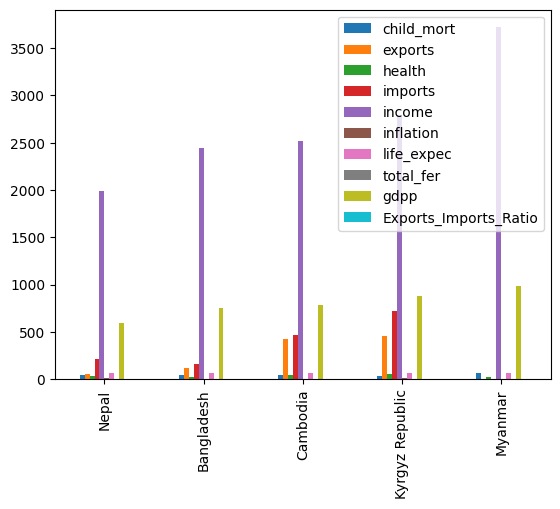

In [207]:
Priority_1_countries.set_index('country').plot(kind='bar')
plt.xlabel('')
plt.show()

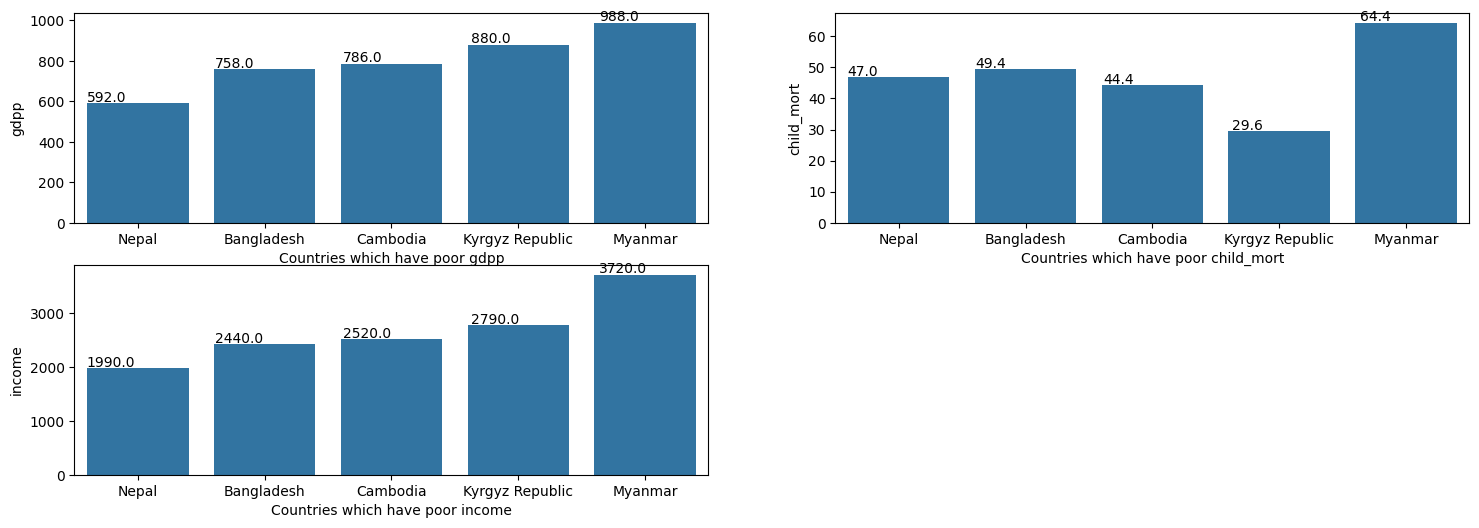

In [208]:
results_plots(Priority_1_countries)

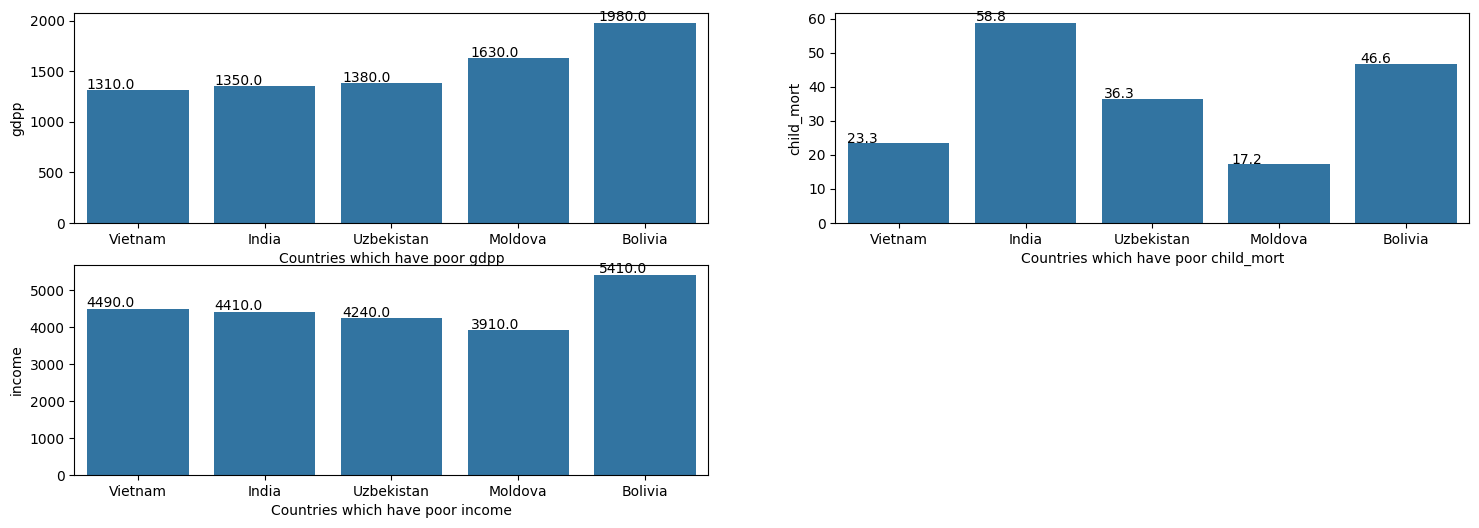

In [209]:
results_plots(Priority_2_countries)

**Suggestions to HELP International - Countries that are in need of aid:**


The following 5 are the countries which have to be provided aid first:

* Burundi
* Liberia
* Congo, Dem. Rep.
* Niger
* Sierra Leone

Once the above countries are provided with Aid, the following are the next set of countries which would require aid in order to reduce the child mortality rate and improve their GDPP and income per person:

* Madagascar
* Mozambique
* Central African Republic
* Malawi
* Eritrea

# DBSCAN

In [224]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

Clus_dataSet = df_scaled[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=1.5, min_samples=3).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
#data['Clus_Db']=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

# A sample of clusters
print(df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']].head())

# number of labels
print("number of labels: ", set(labels))

   child_mort  exports    health   imports   income  inflation  life_expec  \
0        90.2    55.30   41.9174   248.297   1610.0       9.44        56.2   
1        16.6  1145.20  267.8950  1987.740   9930.0       4.49        76.3   
2        27.3  1712.64  185.9820  1400.440  12900.0      16.10        76.5   
3       119.0  2199.19  100.6050  1514.370   5900.0      22.40        60.1   
4        10.3  5551.00  735.6600  7185.800  19100.0       1.44        76.8   

   total_fer     gdpp  
0       5.82    553.0  
1       1.65   4090.0  
2       2.89   4460.0  
3       6.16   3530.0  
4       2.13  12200.0  
number of labels:  {np.int64(0), np.int64(-1)}


In [225]:
pd.Series(db.labels_).value_counts()

,count
0,150
-1,17


In [218]:
# DBSCAN - Try adjusting eps and min_samples
dbscan = DBSCAN(eps=4, min_samples=3)  # Increased eps, decreased min_samples
dbscan_labels = dbscan.fit_predict(df_scaled)

# Evaluate Clustering Performance (only calculate if there are at least 2 clusters)
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels)
    print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')
else:
    print("DBSCAN resulted in a single cluster. Adjust parameters.")

DBSCAN Silhouette Score: 0.6280776876225875
